In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 937 kB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
label_encoder = preprocessing.LabelEncoder()


import yfinance as yf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
on
model will predict xx days into the future
1
run a random forest: (yes/no)
yes
run a xgboost (yes/no):
yes
run a logit (yes/no):
no
run a gradient boosted (yes/no):
yes
how many visualizations would you like to run?
2
please enter the stocks, in the order that you would like to see the visualizations
stock #1
aapl
stock #2
tsla
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
3
category #1
tech
category #2
internet
category #3
software
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.07551020408163266
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.166
Gradient Boosted Accuracy score (validation): 0.113
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.171
Gradie

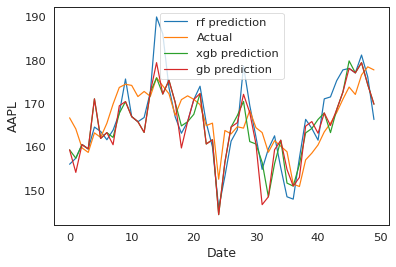

         rf       gb      xgb   actual
0  156.0400 159.3600 159.3600 166.7675
1  157.4400 154.1600 157.4400 164.2108
2  160.5900 160.5900 160.5900 159.8164
3  159.5800 159.5800 159.5800 158.7777
4  164.6300 171.1500 171.1500 163.2920
5  163.6200 162.0000 162.0000 162.2433
6  161.7000 163.3500 163.3500 165.4991
7  163.9300 160.5500 162.2400 169.9435
8  167.8100 169.5400 167.8100 173.7886
9  175.7400 170.5200 170.5200 174.5276
10 167.0400 167.0400 167.0400 174.2580
11 165.8700 165.8700 165.8700 171.6800
12 166.8400 163.4000 163.4000 172.8600
13 172.7100 172.7100 172.7100 171.7300
14 190.0800 179.5200 176.0000 176.0500
15 186.1800 172.2600 172.2600 174.1400
16 173.7200 175.4400 175.4400 172.3300
17 167.0000 170.3400 170.3400 167.3700
18 163.2000 159.8000 164.9000 170.9700
19 165.8700 165.8700 165.8700 171.8500
20 171.0000 171.0000 167.5800 171.0300
21 174.0700 172.3800 172.3800 169.8200
22 165.6400 160.7200 160.7200 164.9800
23 160.0500 161.7000 161.7000 165.5400
24 145.9200 144.4000 144.

KeyError: ignored

In [5]:
from bs4.element import DEFAULT_OUTPUT_ENCODING
print('default (on/off)')
print("       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!")
default = input().lower()
print('model will predict xx days into the future')
shift = int(input())
print('run a random forest: (yes/no)')
random_forest = input()
print('run a xgboost (yes/no):')
xgb = input()
print('run a logit (yes/no):')
logi_regression = input()
print('run a gradient boosted (yes/no):')
gradient_boosted = input()

print('how many visualizations would you like to run?')
num_its = int(input())
print('please enter the stocks, in the order that you would like to see the visualizations')
its = {'its':[]}
categories = {'cats':[]}

for x in range(num_its):
  print('stock #'+str(x+1))
  its['its'].append(str(input()).upper())

print("enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)")
print("3 MAX")
num_cats = int(input())
for x in range(num_cats):
  print('category #'+str(x+1))
  categories['cats'].append(str(input()).lower())

its = pd.DataFrame(its)

for xe in range(num_its):

  if default == 'on':
    ticker = its['its'][xe]
    num_categories = 3
    days_back = 50
    descriptive = 'yes'
    scrape = 'yes'
    num_trees = 2000
    setup = 'on'
    shift_change = 'on'
    start_date = '2021-09-03'
  else:
    print('Enter the # of stock "categories" you would like to include')
    print('      *ensure that the ticker you want to predict is in this category')
    print('      *(find categories @ companiesmarketcap.com)')
    print()
    print('      *3 categories max! (bug)')
    num_categories = int(input())
    descriptive = 'bugged'
    print('the stocks in your selected categories will be stacked on top of each other for training purposes, how many days back would you like each stock to go? (i.e. 10 days: 10 days of past returns for each stock):')
    days_back = int(input())
    print('how many trees do you want the random forest to have?:')
    num_trees = int(input())
    print('Do you need to scrape companymarketcap.com (yes/no) (only need to do once / runtime):')
    scrape = input()
    print('For each stock, we are predicting returns xx days into the future. How many days would you like to lag your data:')
    shift = int(input())
    start_date = '2021-09-03'
    print('yahoo finance data collection (on/off) (every time you change category selection):')
    setup = input()
    print('Quick setup (on/off):')
    shift_change = input()

  

  #------------------------------------------------------

  if descriptive == 'kjjj': #bugged
    msft = yf.Ticker(ticker.upper())
    df = msft.history(period="max")
    df = df.iloc[7000:]
    df = df.reset_index()
    df['date_time'] = df['Date']
    df = df.dropna()
    df['date_time']=pd.to_datetime(df['date_time']) 
    df['year'] = df['date_time'].apply(lambda x: x.year)
    df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
    df['month'] = df['date_time'].apply(lambda x: x.month)
    df['day'] = df['date_time'].apply(lambda x: x.day)
    df=df.loc[:,['date_time','Close', 'year','quarter','month','day']]
    df.sort_values('date_time', inplace=True, ascending=True)
    df = df.reset_index(drop=True)
    print('Number of rows and columns after removing missing values:', df.shape)
    print('The time series starts from: ', df.date_time.min())
    print('The time series ends on: ', df.date_time.max())
    stat, p = stats.normaltest(df.Close)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
    sns.distplot(df.Close);
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Close)))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Close)))
    df1=df.loc[:,['date_time','Close']]
    df1.set_index('date_time',inplace=True)
    df1.plot(figsize=(12,5))
    plt.ylabel(str(ticker.upper()))
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.title(str(ticker.upper())+' Time Series')
    sns.despine(top=True)
    plt.show();
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="year", y="Close", data=df)
    plt.xlabel('year')
    plt.title('Box plot of stock')
    sns.despine(left=True)
    plt.tight_layout()
    plt.subplot(1,2,2)
    sns.boxplot(x="quarter", y="Close", data=df)
    plt.xlabel('quarter')
    plt.title('Box plot of Quarterly Stock Closing Prices')
    sns.despine(left=True)
    plt.tight_layout();
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df['Close'].hist(bins=50)
    plt.title('Closing Price Distribution')
    plt.subplot(1,2,2)
    stats.probplot(df['Close'], plot=plt);
    df1.describe().T
    fig = plt.figure(figsize=(18,16))
    fig.subplots_adjust(hspace=.4)
    ax1 = fig.add_subplot(5,1,1)
    ax1.plot(df1['Close'].resample('D').mean(),linewidth=1)
    ax1.set_title('Mean Closing Price resampled over day')
    ax1.tick_params(axis='both', which='major')
    ax2 = fig.add_subplot(5,1,2, sharex=ax1)
    ax2.plot(df1['Close'].resample('W').mean(),linewidth=1)
    ax2.set_title('Mean Closing Price power resampled over week')
    ax2.tick_params(axis='both', which='major')
    ax3 = fig.add_subplot(5,1,3, sharex=ax1)
    ax3.plot(df1['Close'].resample('M').mean(),linewidth=1)
    ax3.set_title('Mean Closing Price resampled over month')
    ax3.tick_params(axis='both', which='major')
    ax4  = fig.add_subplot(5,1,4, sharex=ax1)
    ax4.plot(df1['Close'].resample('Q').mean(),linewidth=1)
    ax4.set_title('Mean Closing Price over quarter')
    ax4.tick_params(axis='both', which='major')
    ax5  = fig.add_subplot(5,1,5, sharex=ax1)
    ax5.plot(df1['Close'].resample('A').mean(),linewidth=1)
    ax5.set_title('Mean Closing Price resampled over year')
    ax5.tick_params(axis='both', which='major');
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    df.groupby('year').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Year')
    plt.subplot(2,2,2)
    df.groupby('quarter').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Quarter')
    plt.subplot(2,2,3)
    df.groupby('month').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Month')
    plt.subplot(2,2,4)
    df.groupby('day').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Day');


  else:
    print('no visualization')

  if scrape == 'yes':
    urls = [
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/airlines/largest-airlines-by-market-cap/',
      'https://companiesmarketcap.com/airports/largest-airport-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/aircraft-manufacturers/largest-aircraft-manufacturers-by-market-cap/',
      'https://companiesmarketcap.com/banks/largest-banks-by-market-cap/',
      'https://companiesmarketcap.com/hotels/largest-hotel-companies-by-market-cap/',
      'https://companiesmarketcap.com/pharmaceuticals/largest-pharmaceutical-companies-by-market-cap/',
      'https://companiesmarketcap.com/e-commerce/largest-e-commerce-companies-by-market-cap/',
      'https://companiesmarketcap.com/healthcare/largest-healthcare-companies-by-market-cap/',
      'https://companiesmarketcap.com/ports/largest-port-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/professional-services/largest-professional-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/food/largest-food-companies-by-market-cap/',
      'https://companiesmarketcap.com/restaurant-chains/largest-restaurant-chain-companies-by-market-cap/',
      'https://companiesmarketcap.com/software/largest-software-companies-by-market-cap/',
      'https://companiesmarketcap.com/semiconductors/largest-semiconductor-companies-by-market-cap/',
      'https://companiesmarketcap.com/tobacco/largest-tobacco-companies-by-market-cap/',
      'https://companiesmarketcap.com/financial-services/largest-financial-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/oil-gas/largest-oil-and-gas-companies-by-market-cap/',
      'https://companiesmarketcap.com/electricity/largest-electricity-companies-by-market-cap/',
      'https://companiesmarketcap.com/delivery-services/largest-delivery-companies-by-market-cap/',
      'https://companiesmarketcap.com/media-press/largest-media-and-press-companies-by-market-cap/',
      'https://companiesmarketcap.com/alcoholic-beverages/largest-alcoholic-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/beverages/largest-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/clothing/largest-clothing-companies-by-market-cap/',
      'https://companiesmarketcap.com/mining/largest-mining-companies-by-market-cap/',
      'https://companiesmarketcap.com/railways/largest-railways-companies-by-market-cap/',
      'https://companiesmarketcap.com/insurance/largest-insurance-companies-by-market-cap/',
      'https://companiesmarketcap.com/real-estate/largest-real-estate-companies-by-market-cap/',
      'https://companiesmarketcap.com/chemicals/largest-chemical-companies-by-market-cap/',
      'https://companiesmarketcap.com/investment/largest-investment-companies-by-market-cap/',
      'https://companiesmarketcap.com/telecommunication/largest-telecommunication-companies-by-market-cap/',
      'https://companiesmarketcap.com/retail/largest-retail-companies-by-market-cap/',
      'https://companiesmarketcap.com/internet/largest-internet-companies-by-market-cap/',
      'https://companiesmarketcap.com/construction/largest-construction-companies-by-market-cap/',
      'https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/'
    ]
    a = []
    for x in range(len(urls)):
        a.append(urls[x].split('/')[3])
    a

    import requests
    import time
    import bs4
    from bs4 import BeautifulSoup
    cats = ['automakers','airlines','aircraft-manufacturers','banks','pharmaceuticals','e-commerce','healthcare','ports','professional-services','food','restaurant-chains','software','semiconductors','tobacco','financial-services','electricity','courier-services','media/press','alcoholic-beverages','beverages','clothing','mining','railways','insurance','real-estate','chemicals','investment','telecomunication','retail','internet','construction','tech']
    cat_names = {'category':[],'names':[],'ticker':[]}
    try:
        for x in range(len(urls)):
            url = urls[x]
            html = requests.get(url).text
            soup = bs4.BeautifulSoup(html, "html.parser")
            for tag in soup.findAll("div", {"class": "name-div"}):
                    cat_names['names'].append(tag.findNext("div").text)
                    cat_names['category'].append(a[x])
            for tag in soup.findAll("div", {"class": "company-name"}):
                    cat_names['ticker'].append(tag.findNext().text)

    except:
        print(x)
  else:
    print('no scrape')

  if setup == 'on':
    cat_names = pd.DataFrame(cat_names)
    print('enter your industry categories, according to the number you referrenced above')
    gg = []  
    tech = pd.DataFrame()
    cat_holder = []
    for x in range(num_cats):
      x = categories['cats'][xe]
      cat_holder.append(x)
      tech = (cat_names['ticker'][cat_names['category']==x])
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)
    tech = tech.drop_duplicates()
      

    for x in range(len(tech)):
      try:
          xx  = yf.Ticker(tech.iloc[x])
          df = xx.history(period="max")
          df.columns.values[0] = tech.iloc[x]+" Open"
          df.columns.values[1] = tech.iloc[x]+" High"
          df.columns.values[2] = tech.iloc[x]+" Low"
          df.columns.values[3] = tech.iloc[x]+" Close"
          df.columns.values[4] = tech.iloc[x]+" Volume"
          df.columns.values[5] = tech.iloc[x]+" Dividends"
          df.columns.values[6] = tech.iloc[x]+" Stock Splits"
          tech.iloc[x] = df.reset_index()
      except:
        print(tech.iloc[x])

    msft = yf.Ticker(ticker.upper())
    df = msft.history(period="max")
    for ii in range(len(tech)):
      if len(tech.iloc[ii])>=days_back:
        df = pd.merge(df, tech.iloc[ii] ,on = 'Date')
      else:
        print('not long enough!')
    for x in range(num_categories):
      tech = (cat_names['ticker'][cat_names['category']==pd.DataFrame(cat_holder)[0][x]])
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)
    tech = tech.reset_index()
    tech = tech.drop(columns = 'index')
    tech = tech.drop_duplicates()
    tech = tech['ticker']
    aa = pd.DataFrame()
    vol = pd.DataFrame()
    ss = []
    for i in range(len(tech)):
      try:
        aa[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close'].shift(-1*shift) - df[str(tech.iloc[i])+' Open'].shift(shift)).dropna()/df[str(tech.iloc[i])+' Open'].shift(shift).dropna()*100
        vol[str(tech.iloc[i])] = df[str(tech.iloc[i])+' Volume']
      except:
        ss.append(str(tech.iloc[i]))
    aa = round(aa)
    tech = pd.DataFrame(tech)
    dd = pd.DataFrame()
    rr = pd.DataFrame()
    for x in range(len(tech)):
      try:
        rr[tech.iloc[x]] = aa[tech.iloc[x]]
      except:
        print(tech.iloc[x])
    qq = pd.DataFrame()
    for x in range(len(tech)):
      try:
        qq[tech.iloc[x]] = aa[tech.iloc[x]]
      except:
        print(tech.iloc[x])
    ss = []
    df = pd.DataFrame()
    for x in range(len(tech)):
      try:
        df = qq.drop(columns = tech.iloc[x])
        ss.append(df)
      except:
        print(tech.iloc[x])
    pieces = []
    for x in range(len(tech)):
      try:
        pieces.append(ss[x].iloc[-1*days_back:])
        pieces[x] = pieces[x]
      except:
        print(tech.iloc[x])
    df_final = pd.concat(pieces,axis = False, ignore_index = True)
  else:
        print('no setup')
  if shift_change == 'on':
    y = []
    for x in range(len(tech)):
      try:
        y.append(qq[tech['ticker'][x]].iloc[-1*days_back:])
      except:
        print(tech.iloc[x])
    y = pd.concat(y, ignore_index = True)
    yy =y.reset_index()
    yy = yy.drop(columns = 'index')
    yy[0].loc[~(yy[0]==0)]
    yyy = pd.DataFrame()
    yy = yy.dropna()
    yyy['y'] = yy[0]
    yyy = yyy.reset_index()
    tt = round(df_final)
    tt = tt.fillna(1)
    xx = tt.reset_index()
    xx = xx.drop(columns = 'index')
    xx = xx.reset_index()
    xxx = pd.merge(yyy,xx, on = 'index')
    y = xxx['y']
    xxx = xxx.drop(columns = ['index','y'])
    def clean_dataset(df):
      assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
      df.dropna(inplace=True)
      indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
      return df[indices_to_keep].astype(np.float64)
    xxx = clean_dataset(xxx).reset_index()
    yy = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index')
    yy = yy['y'].astype(int)
    xxx = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index').drop(columns = ['y','index','level_0']).astype(int)
    x = xxx
    xx = xxx
    xxx = xxx
    y = yy
    yy = yy
    yyy = yy
  else:
    print('no setup')
  if random_forest == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf=RandomForestClassifier(n_estimators=num_trees)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print('random forest score = '+str(metrics.accuracy_score(y_test, y_pred)))
  else:
    print('no random forest')
  if logi_regression == 'yes':
    xx, yy = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  else:
    print('no logistic regression')
  if gradient_boosted == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2)
    lr_list = [0.05, 0.075, 0.1]
    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(X_train, y_train)
        print("Learning rate: ", learning_rate)
        print("Gradient Boosted Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
        print("Gradient Boosted Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
  else:
    print('no gradient boosted forests')
  if xgb == 'yes':
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    score = xgb_clf.score(X_test, y_test)
    print('XGB Score = '+str(score))
    xt = x.head(days_back)
    yt = x.iloc[days_back:days_back][ticker.upper()]
    yt = yt.reset_index().drop(columns = 'index')
    df_compare_xgb = pd.DataFrame()
    df_compare_xgb['prediction'] = list(xgb_clf.predict(xt))
    df_compare_xgb['actual'] = yt
    df_compare_xgb['dif'] = abs(df_compare_xgb['actual']-df_compare_xgb['prediction'])
    dd = len(df_compare_xgb[df_compare_xgb['dif']==0])
    accuracy = dd/len(df_compare_xgb)*100
    print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracy))
  else:
    print('no xg boosted forest')

  #testing + graphing
  xt = xxx.head(days_back)
  yt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  yt = yt.reset_index().drop(columns = 'index')
  df_compare_rf = pd.DataFrame()
  df_compare_rf['prediction'] = list(clf.predict(xt))
  df_compare_rf['actual'] = yt
  df_compare_rf['dif'] = abs(df_compare_rf['actual']-df_compare_rf['prediction'])
  dd = len(df_compare_rf[df_compare_rf['dif']==0])
  accuracy = dd/len(df_compare_rf)*100
  print('rf forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracy))
  msft = yf.Ticker(ticker.upper())
  df = msft.history(period="max")
  dd = df['Open'].iloc[int(len(df))-days_back:]
  df_ = {'open':[]}
  for x in range(len(dd)):
    df_['open'].append(int(dd[x]))
  df_final = pd.DataFrame()
  df_final[str(ticker.upper())+' prediction'] = df_['open'] + df_compare_rf['prediction']/100*df_['open']
  y1 = df_final[str(ticker.upper())+' prediction']
  xtt = xxx.head(days_back)
  ytt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  ytt = ytt.reset_index().drop(columns = 'index')
  df_compare_xgb = pd.DataFrame()
  df_compare_xgb['prediction'] = list(xgb_clf.predict(xt))
  df_compare_xgb['actual'] = ytt
  df_compare_xgb['dif'] = abs(df_compare_xgb['actual']-df_compare_xgb['prediction'])
  ddd = len(df_compare_xgb[df_compare_xgb['dif']==0])
  accuracyy = ddd/len(df_compare_xgb)*100
  print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyy))
  msftt = yf.Ticker(ticker.upper())
  dff = msftt.history(period="max")
  ddd = dff['Open'].iloc[int(len(dff))-days_back:]
  df__ = {'open':[]}
  for x in range(len(ddd)):
    df__['open'].append(int(ddd[x]))
  df_final_xgb = pd.DataFrame()
  df_final_xgb[str(ticker.upper())+' prediction'] = df__['open'] + df_compare_xgb['prediction']/100*df__['open']
  x11 = df_final_xgb[str(ticker.upper())+' prediction']
  xttt = xxx.head(days_back)
  yttt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  yttt = yttt.reset_index().drop(columns = 'index')
  df_compare_gb = pd.DataFrame()
  df_compare_gb['prediction'] = list(gb_clf.predict(xt))
  df_compare_gb['actual'] = yttt
  df_compare_gb['dif'] = abs(df_compare_gb['actual']-df_compare_gb['prediction'])
  dddd = len(df_compare_gb[df_compare_gb['dif']==0])
  accuracyyy = dddd/len(df_compare_gb)*100
  print('gb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyyy))
  msfttt = yf.Ticker(ticker.upper())
  dfff = msfttt.history(period="max")
  dddd = dfff['Open'].iloc[int(len(dfff))-days_back:]
  df___ = {'open':[]}
  for x in range(len(dddd)):
    df___['open'].append(int(dddd[x]))
  df_finalll = pd.DataFrame()
  df_finalll[str(ticker.upper())+' prediction'] = df___['open'] + df_compare_gb['prediction']/100*df___['open']
  x111 = df_finalll[str(ticker.upper())+' prediction']
  df_check = pd.DataFrame()
  df_check['rf'] = y1
  df_check['gb'] = x111
  df_check['xgb'] = x11
  df_check['actual'] = dd.reset_index().drop(columns = ['Date']).head(days_back)
  ax = y1.head(days_back).plot(label='rf prediction')
  ax = dd.reset_index().drop(columns = ['Date']).head(days_back)['Open'].plot(label='Actual')
  ax = x11.head(days_back).plot(label='xgb prediction')
  ax = x111.head(days_back).plot(label='gb prediction')
  ax.set_xlabel('Date')
  ax.set_ylabel(str(ticker.upper()))
  plt.legend()
  plt.show()



  print(df_check)

default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.09781477627471384
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.166
Gradient Boosted Accuracy score (validation): 0.163
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.169
Gradient Boosted Accuracy score (validation): 0.163
Learning rate:  0.1
Gradient Boosted Accurac

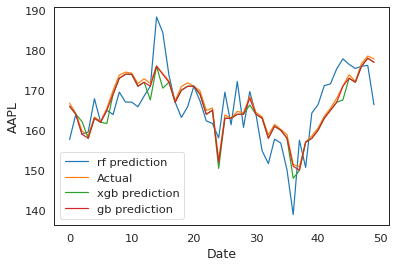

         rf       gb      xgb   actual
0  157.7000 166.0000 166.0000 166.7675
1  164.0000 164.0000 164.0000 164.2108
2  159.0000 159.0000 162.1800 159.8164
3  159.5800 158.0000 158.0000 158.7777
4  167.8900 163.0000 163.0000 163.2920
5  162.0000 162.0000 162.0000 162.2433
6  165.0000 165.0000 161.7000 165.4991
7  163.9300 169.0000 169.0000 169.9435
8  169.5400 173.0000 173.0000 173.7886
9  167.0400 174.0000 174.0000 174.5276
10 167.0400 174.0000 174.0000 174.2580
11 165.8700 171.0000 171.0000 171.6800
12 168.5600 172.0000 172.0000 172.8600
13 171.0000 171.0000 167.5800 171.7300
14 188.3200 176.0000 176.0000 176.0500
15 184.4400 174.0000 170.5200 174.1400
16 173.7200 172.0000 172.0000 172.3300
17 167.0000 167.0000 167.0000 167.3700
18 163.2000 170.0000 170.0000 170.9700
19 165.8700 171.0000 171.0000 171.8500
20 171.0000 171.0000 171.0000 171.0300
21 167.3100 169.0000 169.0000 169.8200
22 162.3600 164.0000 164.0000 164.9800
23 161.7000 165.0000 165.0000 165.5400
24 158.0800 152.0000 150.

In [34]:
from sklearn.utils.validation import as_float_array
from matplotlib.font_manager import afmFontProperty

from bs4.element import DEFAULT_OUTPUT_ENCODING
print('default (on/off)')
print("       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!")
default = 'on'
print('model will predict xx days into the future')
shift = 1
print('run a random forest: (yes/no)')
random_forest = 'yes'
print('run a xgboost (yes/no):')
xgb = 'yes'
print('run a logit (yes/no):')
logi_regression = 'no'
print('run a gradient boosted (yes/no):')
gradient_boosted = 'yes'

print('how many visualizations would you like to run?')
num_its = 1
print('please enter the stocks, in the order that you would like to see the visualizations')
its = {'its':[]}
categories = {'cats':[]}

for x in range(num_its):
  print('stock #'+str(x+1))
  its['its'].append(str(input()).upper())

print("enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)")
print("3 MAX")
num_cats = 1
for x in range(num_cats):
  print('category #'+str(x+1))
  categories['cats'].append('tech')

its = pd.DataFrame(its)

for xe in range(num_its):

  if default == 'on':
    ticker = its['its'][xe]
    num_categories = 3
    days_back = 50
    descriptive = 'yes'
    scrape = 'yes'
    num_trees = 2000
    setup = 'on'
    shift_change = 'on'
    start_date = '2021-09-03'
  else:
    print('Enter the # of stock "categories" you would like to include')
    print('      *ensure that the ticker you want to predict is in this category')
    print('      *(find categories @ companiesmarketcap.com)')
    print()
    print('      *3 categories max! (bug)')
    num_categories = int(input())
    descriptive = 'bugged'
    print('the stocks in your selected categories will be stacked on top of each other for training purposes, how many days back would you like each stock to go? (i.e. 10 days: 10 days of past returns for each stock):')
    days_back = int(input())
    print('how many trees do you want the random forest to have?:')
    num_trees = int(input())
    print('Do you need to scrape companymarketcap.com (yes/no) (only need to do once / runtime):')
    scrape = input()
    print('For each stock, we are predicting returns xx days into the future. How many days would you like to lag your data:')
    shift = int(input())
    start_date = '2021-09-03'
    print('yahoo finance data collection (on/off) (every time you change category selection):')
    setup = input()
    print('Quick setup (on/off):')
    shift_change = input()

  

  #------------------------------------------------------

  if descriptive == 'kjjj': #bugged
    msft = yf.Ticker(ticker.upper())
    df = msft.history(period="max")
    df = df.iloc[7000:]
    df = df.reset_index()
    df['date_time'] = df['Date']
    df = df.dropna()
    df['date_time']=pd.to_datetime(df['date_time']) 
    df['year'] = df['date_time'].apply(lambda x: x.year)
    df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
    df['month'] = df['date_time'].apply(lambda x: x.month)
    df['day'] = df['date_time'].apply(lambda x: x.day)
    df=df.loc[:,['date_time','Close', 'year','quarter','month','day']]
    df.sort_values('date_time', inplace=True, ascending=True)
    df = df.reset_index(drop=True)
    print('Number of rows and columns after removing missing values:', df.shape)
    print('The time series starts from: ', df.date_time.min())
    print('The time series ends on: ', df.date_time.max())
    stat, p = stats.normaltest(df.Close)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
    sns.distplot(df.Close);
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Close)))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Close)))
    df1=df.loc[:,['date_time','Close']]
    df1.set_index('date_time',inplace=True)
    df1.plot(figsize=(12,5))
    plt.ylabel(str(ticker.upper()))
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.title(str(ticker.upper())+' Time Series')
    sns.despine(top=True)
    plt.show();
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="year", y="Close", data=df)
    plt.xlabel('year')
    plt.title('Box plot of stock')
    sns.despine(left=True)
    plt.tight_layout()
    plt.subplot(1,2,2)
    sns.boxplot(x="quarter", y="Close", data=df)
    plt.xlabel('quarter')
    plt.title('Box plot of Quarterly Stock Closing Prices')
    sns.despine(left=True)
    plt.tight_layout();
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df['Close'].hist(bins=50)
    plt.title('Closing Price Distribution')
    plt.subplot(1,2,2)
    stats.probplot(df['Close'], plot=plt);
    df1.describe().T
    fig = plt.figure(figsize=(18,16))
    fig.subplots_adjust(hspace=.4)
    ax1 = fig.add_subplot(5,1,1)
    ax1.plot(df1['Close'].resample('D').mean(),linewidth=1)
    ax1.set_title('Mean Closing Price resampled over day')
    ax1.tick_params(axis='both', which='major')
    ax2 = fig.add_subplot(5,1,2, sharex=ax1)
    ax2.plot(df1['Close'].resample('W').mean(),linewidth=1)
    ax2.set_title('Mean Closing Price power resampled over week')
    ax2.tick_params(axis='both', which='major')
    ax3 = fig.add_subplot(5,1,3, sharex=ax1)
    ax3.plot(df1['Close'].resample('M').mean(),linewidth=1)
    ax3.set_title('Mean Closing Price resampled over month')
    ax3.tick_params(axis='both', which='major')
    ax4  = fig.add_subplot(5,1,4, sharex=ax1)
    ax4.plot(df1['Close'].resample('Q').mean(),linewidth=1)
    ax4.set_title('Mean Closing Price over quarter')
    ax4.tick_params(axis='both', which='major')
    ax5  = fig.add_subplot(5,1,5, sharex=ax1)
    ax5.plot(df1['Close'].resample('A').mean(),linewidth=1)
    ax5.set_title('Mean Closing Price resampled over year')
    ax5.tick_params(axis='both', which='major');
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    df.groupby('year').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Year')
    plt.subplot(2,2,2)
    df.groupby('quarter').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Quarter')
    plt.subplot(2,2,3)
    df.groupby('month').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Month')
    plt.subplot(2,2,4)
    df.groupby('day').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Day');


  else:
    print('no visualization')

  if scrape == 'yes':
    urls = [
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/airlines/largest-airlines-by-market-cap/',
      'https://companiesmarketcap.com/airports/largest-airport-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/aircraft-manufacturers/largest-aircraft-manufacturers-by-market-cap/',
      'https://companiesmarketcap.com/banks/largest-banks-by-market-cap/',
      'https://companiesmarketcap.com/hotels/largest-hotel-companies-by-market-cap/',
      'https://companiesmarketcap.com/pharmaceuticals/largest-pharmaceutical-companies-by-market-cap/',
      'https://companiesmarketcap.com/e-commerce/largest-e-commerce-companies-by-market-cap/',
      'https://companiesmarketcap.com/healthcare/largest-healthcare-companies-by-market-cap/',
      'https://companiesmarketcap.com/ports/largest-port-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/professional-services/largest-professional-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/food/largest-food-companies-by-market-cap/',
      'https://companiesmarketcap.com/restaurant-chains/largest-restaurant-chain-companies-by-market-cap/',
      'https://companiesmarketcap.com/software/largest-software-companies-by-market-cap/',
      'https://companiesmarketcap.com/semiconductors/largest-semiconductor-companies-by-market-cap/',
      'https://companiesmarketcap.com/tobacco/largest-tobacco-companies-by-market-cap/',
      'https://companiesmarketcap.com/financial-services/largest-financial-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/oil-gas/largest-oil-and-gas-companies-by-market-cap/',
      'https://companiesmarketcap.com/electricity/largest-electricity-companies-by-market-cap/',
      'https://companiesmarketcap.com/delivery-services/largest-delivery-companies-by-market-cap/',
      'https://companiesmarketcap.com/media-press/largest-media-and-press-companies-by-market-cap/',
      'https://companiesmarketcap.com/alcoholic-beverages/largest-alcoholic-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/beverages/largest-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/clothing/largest-clothing-companies-by-market-cap/',
      'https://companiesmarketcap.com/mining/largest-mining-companies-by-market-cap/',
      'https://companiesmarketcap.com/railways/largest-railways-companies-by-market-cap/',
      'https://companiesmarketcap.com/insurance/largest-insurance-companies-by-market-cap/',
      'https://companiesmarketcap.com/real-estate/largest-real-estate-companies-by-market-cap/',
      'https://companiesmarketcap.com/chemicals/largest-chemical-companies-by-market-cap/',
      'https://companiesmarketcap.com/investment/largest-investment-companies-by-market-cap/',
      'https://companiesmarketcap.com/telecommunication/largest-telecommunication-companies-by-market-cap/',
      'https://companiesmarketcap.com/retail/largest-retail-companies-by-market-cap/',
      'https://companiesmarketcap.com/internet/largest-internet-companies-by-market-cap/',
      'https://companiesmarketcap.com/construction/largest-construction-companies-by-market-cap/',
      'https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/'
    ]
    a = []
    for x in range(len(urls)):
        a.append(urls[x].split('/')[3])
    a

    import requests
    import time
    import bs4
    from bs4 import BeautifulSoup
    cats = ['automakers','airlines','aircraft-manufacturers','banks','pharmaceuticals','e-commerce','healthcare','ports','professional-services','food','restaurant-chains','software','semiconductors','tobacco','financial-services','electricity','courier-services','media/press','alcoholic-beverages','beverages','clothing','mining','railways','insurance','real-estate','chemicals','investment','telecomunication','retail','internet','construction','tech']
    cat_names = {'category':[],'names':[],'ticker':[]}
    try:
        for x in range(len(urls)):
            url = urls[x]
            html = requests.get(url).text
            soup = bs4.BeautifulSoup(html, "html.parser")
            for tag in soup.findAll("div", {"class": "name-div"}):
                    cat_names['names'].append(tag.findNext("div").text)
                    cat_names['category'].append(a[x])
            for tag in soup.findAll("div", {"class": "company-name"}):
                    cat_names['ticker'].append(tag.findNext().text)

    except:
        print(x)
  else:
    print('no scrape')

  if setup == 'on':
    cat_names = pd.DataFrame(cat_names)
    print('enter your industry categories, according to the number you referrenced above')
    gg = []  
    tech = pd.DataFrame()
    cat_holder = []
    for x in range(num_cats):
      x = categories['cats'][xe]
      cat_holder.append(x)
      tech = (cat_names['ticker'][cat_names['category']==x])
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)
    tech = tech.drop_duplicates()
      

    for x in range(len(tech)):
      try:
          xx  = yf.Ticker(tech.iloc[x])
          df = xx.history(period="max")
          df.columns.values[0] = tech.iloc[x]+" Open"
          df.columns.values[1] = tech.iloc[x]+" High"
          df.columns.values[2] = tech.iloc[x]+" Low"
          df.columns.values[3] = tech.iloc[x]+" Close"
          df.columns.values[4] = tech.iloc[x]+" Volume"
          df.columns.values[5] = tech.iloc[x]+" Dividends"
          df.columns.values[6] = tech.iloc[x]+" Stock Splits"
          tech.iloc[x] = df.reset_index()
      except:
        print(tech.iloc[x])

    msft = yf.Ticker(ticker.upper())
    df = msft.history(period="max")
    for ii in range(len(tech)):
      if len(tech.iloc[ii])>=days_back:
        df = pd.merge(df, tech.iloc[ii] ,on = 'Date')
      else:
        print('not long enough!')
    for x in range(num_categories):
      try:
        tech = (cat_names['ticker'][cat_names['category']==pd.DataFrame(cat_holder)[0][x]])
      except:
        fck = 2
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)
    tech = tech.reset_index()
    tech = tech.drop(columns = 'index')
    tech = tech.drop_duplicates()
    tech = tech['ticker']
    af = pd.DataFrame()
    aa = pd.DataFrame()
    vol = pd.DataFrame()
    ss = []
    for i in range(len(tech)):
      try:
        aa[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close'].shift(-1*shift) - df[str(tech.iloc[i])+' Open'].shift(shift)).dropna()/df[str(tech.iloc[i])+' Open'].shift(shift).dropna()*100
        af[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close'].shift(-1*shift) - df[str(tech.iloc[i])+' Open'].shift(shift)).dropna()/df[str(tech.iloc[i])+' Open'].shift(shift).dropna()*100
        vol[str(tech.iloc[i])] = df[str(tech.iloc[i])+' Volume']
      except:
        ss.append(str(tech.iloc[i]))
    aa = round(aa)
    tech = pd.DataFrame(tech)
    dd = pd.DataFrame()
    rr = pd.DataFrame()
    for x in range(len(tech)):
      try:
        rr[tech.iloc[x]] = aa[tech.iloc[x]]
      except:
        print(tech.iloc[x])
    qq = pd.DataFrame()
    for x in range(len(tech)):
      try:
        qq[tech.iloc[x]] = af[tech.iloc[x]]
      except:
        print(tech.iloc[x])
    ss = []
    df = pd.DataFrame()
    for x in range(len(tech)):
      try:
        df = qq.drop(columns = tech.iloc[x])
        ss.append(df)
      except:
        print(tech.iloc[x])
    pieces = []
    for x in range(len(tech)):
      try:
        pieces.append(ss[x].iloc[-1*(days_back-1):])
        pieces[x] = pieces[x]
      except:
        print(tech.iloc[x])
    df_final = pd.concat(pieces,axis = False, ignore_index = True)
  else:
        print('no setup')
  if shift_change == 'on':
    y = []
    for x in range(len(tech)):
      try:
        y.append(qq[tech['ticker'][x]].iloc[-1*days_back:].shift(1))
      except:
        print(tech.iloc[x])
    y = pd.concat(y, ignore_index = True)
    yy =y.reset_index()
    yy = yy.drop(columns = 'index')
    yy[0].loc[~(yy[0]==0)]
    yyy = pd.DataFrame()
    yy = yy.dropna()
    yyy['y'] = yy[0]
    yyy = yyy.reset_index()
    tt = round(df_final)
    tt = tt.fillna(1)
    xx = tt.reset_index()
    xx = xx.drop(columns = 'index')
    xx = xx.reset_index()
    xxx = pd.merge(yyy,xx, on = 'index')
    y = xxx['y']
    xxx = xxx.drop(columns = ['index','y'])
    def clean_dataset(df):
      assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
      df.dropna(inplace=True)
      indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
      return df[indices_to_keep].astype(np.float64)
    xxx = clean_dataset(xxx).reset_index()
    yy = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index')
    yy = yy['y'].astype(int)
    xxx = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index').drop(columns = ['y','index','level_0']).astype(int)
    x = xxx
    xx = xxx
    xxx = xxx
    y = yy
    yy = yy
    yyy = yy
  else:
    print('no setup')
  if random_forest == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf=RandomForestClassifier(n_estimators=num_trees)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print('random forest score = '+str(metrics.accuracy_score(y_test, y_pred)))
  else:
    print('no random forest')
  if logi_regression == 'yes':
    xx, yy = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  else:
    print('no logistic regression')
  if gradient_boosted == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2)
    lr_list = [0.05, 0.075, 0.1]
    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(X_train, y_train)
        print("Learning rate: ", learning_rate)
        print("Gradient Boosted Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
        print("Gradient Boosted Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
  else:
    print('no gradient boosted forests')
  if xgb == 'yes':
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    score = xgb_clf.score(X_test, y_test)
    print('XGB Score = '+str(score))
    xt = x.head(days_back)
    yt = x.iloc[days_back:days_back][ticker.upper()]
    yt = yt.reset_index().drop(columns = 'index')
    df_compare_xgb = pd.DataFrame()
    df_compare_xgb['prediction'] = list(xgb_clf.predict(xt))
    df_compare_xgb['actual'] = yt
    df_compare_xgb['dif'] = abs(df_compare_xgb['actual']-df_compare_xgb['prediction'])
    dd = len(df_compare_xgb[df_compare_xgb['dif']==0])
    accuracy = dd/len(df_compare_xgb)*100
    print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracy))
  else:
    print('no xg boosted forest')

  #testing + graphing
  xt = xxx.head(days_back)
  yt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  yt = yt.reset_index().drop(columns = 'index')
  df_compare_rf = pd.DataFrame()
  df_compare_rf['prediction'] = list(clf.predict(xt))
  df_compare_rf['actual'] = yt
  df_compare_rf['dif'] = abs(df_compare_rf['actual']-df_compare_rf['prediction'])
  dd = len(df_compare_rf[df_compare_rf['dif']==0])
  accuracy = dd/len(df_compare_rf)*100
  print('rf forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracy))
  msft = yf.Ticker(ticker.upper())
  df = msft.history(period="max")
  dd = df['Open'].iloc[int(len(df))-days_back:]
  df_ = {'open':[]}
  for x in range(len(dd)):
    df_['open'].append(int(dd[x]))
  df_final = pd.DataFrame()
  df_final[str(ticker.upper())+' prediction'] = df_['open'] + df_compare_rf['prediction']/100*df_['open']
  y1 = df_final[str(ticker.upper())+' prediction']
  xtt = xxx.head(days_back)
  ytt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  ytt = ytt.reset_index().drop(columns = 'index')
  df_compare_xgb = pd.DataFrame()
  df_compare_xgb['prediction'] = list(xgb_clf.predict(xt))
  df_compare_xgb['actual'] = ytt
  df_compare_xgb['dif'] = abs(df_compare_xgb['actual']-df_compare_xgb['prediction'])
  ddd = len(df_compare_xgb[df_compare_xgb['dif']==0])
  accuracyy = ddd/len(df_compare_xgb)*100
  print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyy))
  msftt = yf.Ticker(ticker.upper())
  dff = msftt.history(period="max")
  ddd = dff['Open'].iloc[int(len(dff))-days_back:]
  df__ = {'open':[]}
  for x in range(len(ddd)):
    df__['open'].append(int(ddd[x]))
  df_final_xgb = pd.DataFrame()
  df_final_xgb[str(ticker.upper())+' prediction'] = df__['open'] + df_compare_xgb['prediction']/100*df__['open']
  x11 = df_final_xgb[str(ticker.upper())+' prediction']
  xttt = xxx.head(days_back)
  yttt = xxx.iloc[days_back:days_back*2][ticker.upper()]
  yttt = yttt.reset_index().drop(columns = 'index')
  df_compare_gb = pd.DataFrame()
  df_compare_gb['prediction'] = list(gb_clf.predict(xt))
  df_compare_gb['actual'] = yttt
  df_compare_gb['dif'] = abs(df_compare_gb['actual']-df_compare_gb['prediction'])
  dddd = len(df_compare_gb[df_compare_gb['dif']==0])
  accuracyyy = dddd/len(df_compare_gb)*100
  print('gb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyyy))
  msfttt = yf.Ticker(ticker.upper())
  dfff = msfttt.history(period="max")
  dddd = dfff['Open'].iloc[int(len(dfff))-days_back:]
  df___ = {'open':[]}
  for x in range(len(dddd)):
    df___['open'].append(int(dddd[x]))
  df_finalll = pd.DataFrame()
  df_finalll[str(ticker.upper())+' prediction'] = df___['open'] + df_compare_gb['prediction']/100*df___['open']
  x111 = df_finalll[str(ticker.upper())+' prediction']
  df_check = pd.DataFrame()
  df_check['rf'] = y1
  df_check['gb'] = x111
  df_check['xgb'] = x11
  df_check['actual'] = dd.reset_index().drop(columns = ['Date']).head(days_back)
  ax = y1.head(days_back).plot(label='rf prediction')
  ax = dd.reset_index().drop(columns = ['Date']).head(days_back)['Open'].plot(label='Actual')
  ax = x11.head(days_back).plot(label='xgb prediction')
  ax = x111.head(days_back).plot(label='gb prediction')
  ax.set_xlabel('Date')
  ax.set_ylabel(str(ticker.upper()))
  plt.legend()
  plt.show()



  print(df_check)

In [30]:
ss[x].iloc[-1*days_back:]

,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,...,035720.KS,CSU.TO,EA,ZM,ALGN,ZS,EBAY,TTD,GFS,VEEV
73,-1.0000,-2.0000,-2.0000,-3.0000,-4.0000,-3.0000,-2.0000,-3.0000,-7.0000,1.0000,...,2.0000,-2.0000,-1.0000,-11.0000,-8.0000,-11.0000,2.0000,-9.0000,4.0000,-19.0000
74,-5.0000,-8.0000,-7.0000,-10.0000,-8.0000,-12.0000,-10.0000,-10.0000,-8.0000,-3.0000,...,-5.0000,-4.0000,-3.0000,-12.0000,-13.0000,-19.0000,-1.0000,-20.0000,-10.0000,-7.0000
75,-4.0000,-6.0000,-5.0000,-8.0000,-3.0000,-8.0000,-6.0000,-7.0000,-4.0000,-5.0000,...,-5.0000,-4.0000,-3.0000,-5.0000,-13.0000,-18.0000,-2.0000,-22.0000,-8.0000,-6.0000
76,-3.0000,-1.0000,1.0000,1.0000,-2.0000,-1.0000,-3.0000,1.0000,-6.0000,-1.0000,...,-1.0000,2.0000,-2.0000,-7.0000,-7.0000,-9.0000,-6.0000,-17.0000,-3.0000,-1.0000
77,-3.0000,1.0000,3.0000,6.0000,-0.0000,4.0000,-0.0000,1.0000,-9.0000,2.0000,...,2.0000,-2.0000,-3.0000,-8.0000,-7.0000,-1.0000,-9.0000,-13.0000,6.0000,-3.0000
78,-6.0000,-2.0000,-4.0000,-3.0000,-10.0000,-5.0000,-4.0000,-5.0000,-15.0000,1.0000,...,12.0000,-0.0000,-4.0000,-11.0000,-12.0000,-11.0000,-2.0000,-19.0000,3.0000,-8.0000
79,-2.0000,-0.0000,-3.0000,-1.0000,-5.0000,-0.0000,-0.0000,-3.0000,-17.0000,-0.0000,...,12.0000,-3.0000,-3.0000,-4.0000,-11.0000,-7.0000,2.0000,-16.0000,11.0000,-7.0000
80,5.0000,5.0000,2.0000,5.0000,8.0000,12.0000,9.0000,5.0000,27.0000,1.0000,...,1.0000,3.0000,1.0000,10.0000,4.0000,4.0000,9.0000,7.0000,20.0000,6.0000
81,6.0000,5.0000,5.0000,10.0000,12.0000,15.0000,9.0000,9.0000,27.0000,0.0000,...,0.0000,5.0000,5.0000,16.0000,12.0000,13.0000,6.0000,24.0000,23.0000,11.0000
82,4.0000,4.0000,4.0000,9.0000,12.0000,13.0000,11.0000,4.0000,10.0000,1.0000,...,5.0000,6.0000,4.0000,16.0000,10.0000,11.0000,4.0000,24.0000,18.0000,11.0000


In [33]:
qq[tech['ticker'][5]].iloc[-1*days_back:]

73    -3.0000
74   -12.0000
75    -8.0000
76    -1.0000
77     4.0000
78    -5.0000
79    -0.0000
80    12.0000
81    15.0000
82    13.0000
83    11.0000
84     7.0000
85    -3.0000
86     5.0000
87     6.0000
88     8.0000
89     3.0000
90    -0.0000
91    -5.0000
92        NaN
Name: NVDA, dtype: float64

default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
tsla
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.08947368421052632
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.205
Gradient Boosted Accuracy score (validation): 0.095
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.212
Gradient Boosted Accuracy score (validation): 0.103
Learning rate:  0.1
Gradient Boosted Ac

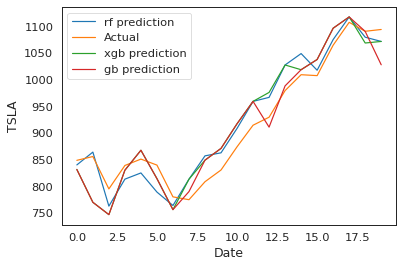

          rf        gb       xgb    actual
0   840.5100  832.0200  832.0200  849.1000
1   864.5600  770.4000  770.4000  856.3000
2   763.2000  747.3000  747.3000  795.5300
3   813.8300  830.6100  830.6100  839.4800
4   825.4700  868.0200  868.0200  851.4500
5   789.6000  814.8000  814.8000  840.2000
6   764.4000  756.6000  756.6000  780.6100
7   813.7500  790.5000  813.7500  775.2700
8   857.5400  849.4500  849.4500  809.0000
9   863.2000  871.5000  871.5000  830.9900
10  908.9600  917.7000  917.7000  874.4900
11  959.7000  959.7000  959.7000  914.9800
12  967.2000  911.4000  976.5000  930.0000
13 1027.9500  988.7900 1027.9500  979.9400
14 1049.3600 1019.0900 1019.0900 1009.7300
15 1018.0800 1038.2400 1038.2400 1008.0000
16 1075.6500 1096.9500 1096.9500 1065.1000
17 1118.0700 1118.0700 1118.0700 1107.9900
18 1080.0900 1091.0000 1069.1800 1091.1700
19 1072.1200 1028.3600 1072.1200 1094.5699


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
adbe
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.08157894736842106
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.205
Gradient Boosted Accuracy score (validation): 0.139
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.208
Gradient Boosted Accuracy score (validation): 0.139
Learning rate:  0.1
Gradient Boosted Ac

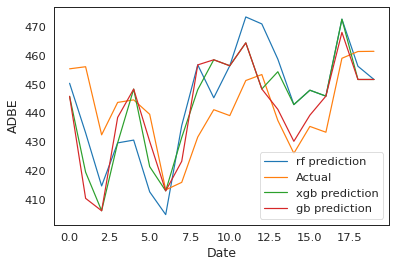

         rf       gb      xgb   actual
0  450.4500 445.9000 445.9000 455.4900
1  433.2000 410.4000 419.5200 456.2200
2  414.7200 406.0800 406.0800 432.5100
3  429.7100 438.5700 429.7100 443.8000
4  430.6800 448.4400 448.4400 444.6800
5  412.6600 430.2200 421.4400 439.6600
6  404.7400 413.0000 413.0000 413.3600
7  435.7500 423.3000 431.6000 415.9700
8  456.8600 456.8600 448.2400 431.7400
9  445.4100 458.6400 458.6400 441.2600
10 456.5600 456.5600 456.5600 439.2000
11 473.5500 464.5300 464.5300 451.4200
12 471.1200 448.4700 448.4700 453.5000
13 458.8500 441.3700 454.4800 437.5100
14 443.0400 430.2600 443.0400 426.0800
15 448.0500 439.3500 448.0500 435.4400
16 445.9900 445.9900 445.9900 433.4200
17 472.7700 468.1800 472.7700 459.1600
18 456.3900 451.7800 451.7800 461.5200
19 451.7800 451.7800 451.7800 461.5900


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.12105263157894737
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.208
Gradient Boosted Accuracy score (validation): 0.105
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.212
Gradient Boosted Accuracy score (validation): 0.105
Learning rate:  0.1
Gradient Boosted Accurac

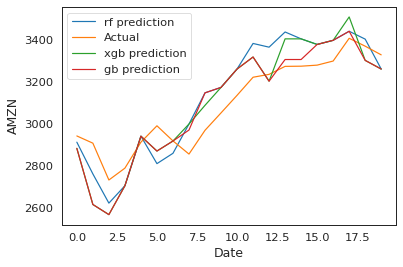

          rf        gb       xgb    actual
0  2913.5700 2884.1400 2884.1400 2943.1799
1  2762.6000 2617.2000 2617.2000 2908.8701
2  2623.6800 2569.0200 2569.0200 2733.6699
3  2706.3000 2706.3000 2706.3000 2790.0000
4  2942.1300 2942.1300 2942.1300 2913.7000
5  2811.5400 2871.3600 2871.3600 2991.4900
6  2860.6200 2919.0000 2919.0000 2919.6201
7  2999.8500 2971.2800 2999.8500 2857.0000
8  3148.2000 3148.2000 3088.8000 2970.0000
9  3174.0800 3174.0800 3174.0800 3052.8101
10 3261.4400 3261.4400 3261.4400 3136.2600
11 3383.1000 3318.6600 3318.6600 3222.4199
12 3365.4400 3203.6400 3203.6400 3236.1101
13 3437.7000 3306.7400 3404.9600 3274.1001
14 3404.9600 3306.7400 3404.9600 3274.9900
15 3378.4000 3378.4000 3378.4000 3280.0000
16 3397.9700 3397.9700 3397.9700 3299.5000
17 3441.0700 3441.0700 3509.2100 3407.6799
18 3403.7000 3302.6000 3302.6000 3370.1899
19 3261.4400 3261.4400 3261.4400 3328.8999


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.10526315789473684
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.195
Gradient Boosted Accuracy score (validation): 0.142
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.203
Gradient Boosted Accuracy score (validation): 0.132
Learning rate:  0.1
Gradient Boosted Accurac

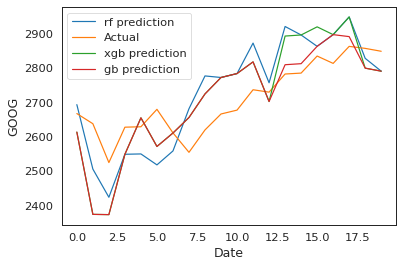

          rf        gb       xgb    actual
0  2693.6700 2613.6600 2613.6600 2667.6499
1  2506.1000 2374.2000 2374.2000 2638.0801
2  2424.0000 2373.5000 2373.5000 2525.0100
3  2549.1600 2549.1600 2549.1600 2628.0000
4  2550.1300 2655.2900 2655.2900 2629.2500
5  2518.2600 2571.8400 2571.8400 2679.9900
6  2558.7800 2611.0000 2611.0000 2611.4600
7  2681.7000 2656.1600 2656.1600 2554.8301
8  2777.2000 2724.8000 2724.8000 2620.0000
9  2772.6400 2772.6400 2772.6400 2666.4199
10 2784.0800 2784.0800 2784.0800 2677.6799
11 2872.8000 2818.0800 2818.0800 2736.9500
12 2757.3000 2702.7000 2702.7000 2730.0000
13 2921.1000 2809.8200 2893.2800 2782.7700
14 2896.4000 2812.8500 2896.4000 2785.4500
15 2863.3500 2863.3500 2920.0500 2835.0801
16 2897.3900 2897.3900 2897.3900 2813.6899
17 2948.8900 2891.6300 2948.8900 2863.2100
18 2828.4300 2799.8600 2799.8600 2857.3999
19 2791.0400 2791.0400 2791.0400 2848.9700


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.0868421052631579
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.202
Gradient Boosted Accuracy score (validation): 0.132
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.211
Gradient Boosted Accuracy score (validation): 0.126
Learning rate:  0.1
Gradient Boosted Accuracy

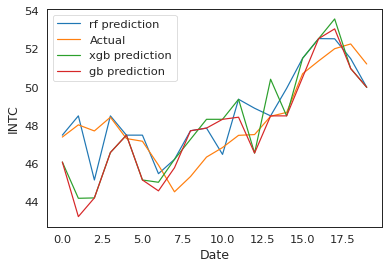

        rf      gb     xgb  actual
0  47.4700 46.0600 46.0600 47.3700
1  48.4800 43.2000 44.1600 48.0100
2  45.1200 44.1800 44.1800 47.6900
3  48.4800 46.5600 46.5600 48.4100
4  47.4700 47.4700 47.4700 47.2900
5  47.4700 45.1200 45.1200 47.1500
6  45.4500 44.5500 45.0000 45.9000
7  46.2000 45.7600 46.2000 44.5000
8  47.7000 47.7000 47.2500 45.3000
9  47.8400 47.8400 48.3000 46.3200
10 46.4600 48.3000 48.3000 46.8200
11 49.3500 48.4100 49.3500 47.4600
12 48.8800 46.5300 46.5300 47.5000
13 48.4800 48.4800 50.4000 48.4600
14 49.9200 48.4800 48.4800 48.6600
15 51.5000 50.5000 51.5000 50.6900
16 52.5300 52.5300 52.5300 51.3600
17 52.5200 53.0400 53.5600 52.0000
18 51.4800 50.9600 50.9600 52.2500
19 49.9800 49.9800 49.9800 51.2000


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.08947368421052632
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.186
Gradient Boosted Accuracy score (validation): 0.137
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.196
Gradient Boosted Accuracy score (validation): 0.129
Learning rate:  0.1
Gradient Boosted Accurac

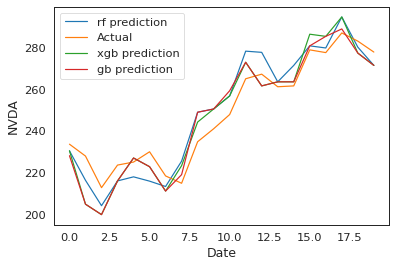

         rf       gb      xgb   actual
0  230.6700 228.3400 230.6700 233.8400
1  216.6000 205.2000 205.2000 228.1700
2  204.4800 200.2200 200.2200 213.0900
3  216.3100 216.3100 216.3100 223.8700
4  218.2500 227.2500 227.2500 225.3100
5  216.2000 223.1000 223.1000 230.2200
6  213.6400 211.4600 211.4600 218.6900
7  225.7500 219.3000 223.6000 215.1800
8  249.1000 249.1000 244.4000 235.0000
9  250.6400 250.6400 250.6400 241.2000
10 256.8800 259.3500 256.8800 247.9900
11 278.2500 272.9500 272.9500 265.0700
12 277.6800 261.6600 261.6600 267.2700
13 263.6100 263.6100 263.6100 261.2600
14 271.4400 263.6100 263.6100 261.6600
15 280.7800 280.7800 286.3400 278.8600
16 279.7700 285.3100 285.3100 277.5600
17 294.5800 288.8600 294.5800 286.9500
18 280.1700 277.3400 277.3400 283.0400
19 271.4600 271.4600 271.4600 277.8200


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.10789473684210527
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.195
Gradient Boosted Accuracy score (validation): 0.121
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.188
Gradient Boosted Accuracy score (validation): 0.126
Learning rate:  0.1
Gradient Boosted Accurac

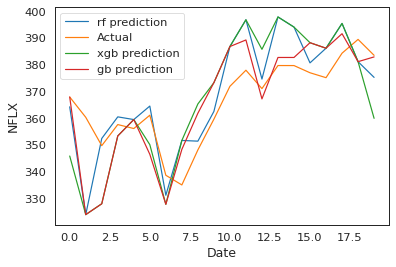

         rf       gb      xgb   actual
0  364.3200 368.0000 345.9200 368.0000
1  324.0000 324.0000 324.0000 360.4100
2  352.4900 328.0600 328.0600 349.8000
3  360.5700 353.4300 353.4300 357.6900
4  359.5600 359.5600 359.5600 356.2000
5  364.6100 346.5600 350.1700 361.1900
6  331.2400 327.8600 327.8600 338.7200
7  351.7500 348.4000 351.7500 335.1000
8  351.4800 361.9200 365.4000 348.2000
9  362.5900 373.3600 373.3600 359.7000
10 386.8800 386.8800 386.8800 372.0000
11 396.9000 389.3400 396.9000 378.0200
12 374.7100 367.2900 385.8400 371.1400
13 397.9500 382.7900 397.9500 379.7700
14 394.1600 382.7900 394.1600 379.7600
15 380.7700 388.3100 388.3100 377.0700
16 386.2500 386.2500 386.2500 375.2300
17 395.5200 391.6800 395.5200 384.3900
18 381.2200 381.2200 381.2200 389.5500
19 375.3400 383.0000 360.0200 383.5900


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.10263157894736842
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.198
Gradient Boosted Accuracy score (validation): 0.142
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.207
Gradient Boosted Accuracy score (validation): 0.145
Learning rate:  0.1
Gradient Boosted Accurac

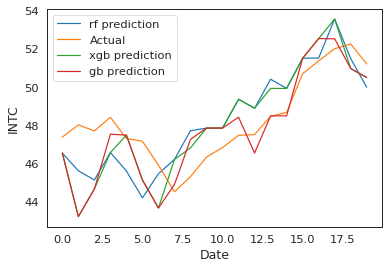

        rf      gb     xgb  actual
0  46.5300 46.5300 46.5300 47.3700
1  45.6000 43.2000 43.2000 48.0100
2  45.1200 44.6500 44.6500 47.6900
3  46.5600 47.5200 46.5600 48.4100
4  45.5900 47.4700 47.4700 47.2900
5  44.1800 45.1200 45.1200 47.1500
6  45.4500 43.6500 43.6500 45.9000
7  46.2000 44.8800 46.2000 44.5000
8  47.7000 47.2500 46.8000 45.3000
9  47.8400 47.8400 47.8400 46.3200
10 47.8400 47.8400 47.8400 46.8200
11 49.3500 48.4100 49.3500 47.4600
12 48.8800 46.5300 48.8800 47.5000
13 50.4000 48.4800 49.9200 48.4600
14 49.9200 48.4800 49.9200 48.6600
15 51.5000 51.5000 51.5000 50.6900
16 51.5100 52.5300 52.5300 51.3600
17 53.5600 52.5200 53.5600 52.0000
18 51.4800 50.9600 50.9600 52.2500
19 49.9800 50.4900 50.4900 51.2000


default (on/off)
       * specs: up to 3 categories, you choose ticker+forecast period, 2k trees, trained on last 50 days of each stock's returns!
model will predict xx days into the future
run a random forest: (yes/no)
run a xgboost (yes/no):
run a logit (yes/no):
run a gradient boosted (yes/no):
how many visualizations would you like to run?
please enter the stocks, in the order that you would like to see the visualizations
stock #1
enter the # of categories you'd like to use as dependent variables (companiesmarketcap.com)
3 MAX
category #1
no visualization
enter your industry categories, according to the number you referrenced above
random forest score = 0.10263157894736842
no logistic regression
Learning rate:  0.05
Gradient Boosted Accuracy score (training): 0.196
Gradient Boosted Accuracy score (validation): 0.111
Learning rate:  0.075
Gradient Boosted Accuracy score (training): 0.205
Gradient Boosted Accuracy score (validation): 0.129
Learning rate:  0.1
Gradient Boosted Accurac

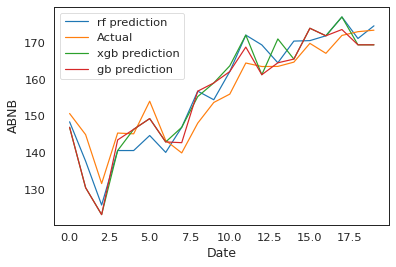

         rf       gb      xgb   actual
0  148.5000 147.0000 147.0000 150.7700
1  137.7500 130.5000 130.5000 145.0000
2  125.7600 123.1400 123.1400 131.6300
3  140.6500 143.5500 140.6500 145.4300
4  140.6500 146.4500 146.4500 145.2200
5  144.7600 149.3800 149.3800 154.1300
6  140.1400 143.0000 143.0000 143.4100
7  147.0000 142.8000 147.0000 140.0000
8  156.8800 156.8800 155.4000 148.1450
9  154.5300 159.1200 159.1200 153.7900
10 162.2400 162.2400 163.8000 156.0700
11 172.2000 168.9200 172.2000 164.5700
12 169.5200 161.3700 161.3700 163.6100
13 164.6300 164.6300 171.1500 163.6400
14 170.5600 165.6400 165.6400 164.8100
15 170.6900 174.0700 174.0700 169.9400
16 172.0100 172.0100 172.0100 167.2200
17 177.1600 173.7200 177.1600 172.1100
18 171.2700 169.5400 169.5400 173.1310
19 174.7300 169.5400 169.5400 173.5400


In [ ]:
#SCRAPYARD

In [ ]:
tech.iloc[ii]

'VCSA'

In [ ]:
  msft = yf.Ticker(ticker.upper())
  df = msft.history(period="max")
  for ii in range(len(tech)):
    if len(tech.iloc[ii])>=days_back-shift:
      df = pd.merge(df, tech.iloc[ii] ,on = 'Date')
    else:
      print('not long enough!')
  for x in range(num_categories):
    tech = (cat_names['ticker'][cat_names['category']==pd.DataFrame(cat_holder)[0][x]])
    gg.append(tech)
  tech = pd.concat(gg,ignore_index = True)
  tech = tech.reset_index()
  tech = tech.drop(columns = 'index')
  tech = tech.drop_duplicates()
  tech = tech['ticker']
  aa = pd.DataFrame()
  vol = pd.DataFrame()
  ss = []
  for i in range(len(tech)):
    try:
      aa[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close'].shift(-1*shift).dropna().reset_index().drop(columns = 'index')- df[str(tech.iloc[i])+' Open'].shift(shift).dropna().reset_index().drop(columns = 'index'))/df[str(tech.iloc[i])+' Open'].shift(shift).dropna().reset_index().drop(columns = 'index')*100
      vol[str(tech.iloc[i])] = df[str(tech.iloc[i])+' Volume']
    except:
      ss.append(str(tech.iloc[i]))


not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enough!
not long enoug

In [ ]:
cat_names

,category,names,ticker
0,automakers,Tesla,TSLA
1,automakers,Toyota,TM
2,automakers,Volkswagen,VOW3.DE
3,automakers,BYD,002594.SZ
4,automakers,Mercedes-Benz,MBG.DE
...,...,...,...
2502,tech,Align Technology\n,ALGN
2503,tech,eBay,EBAY
2504,tech,Zscaler,ZS
2505,tech,The Trade Desk\n,TTD


In [ ]:
df

""


In [ ]:
aa[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close'].shift(-shift).dropna().reset_index().drop(columns = 'index')- df[str(tech.iloc[i])+' Open'].shift(shift).dropna().reset_index().drop(columns = 'index'))/df[str(tech.iloc[i])+' Open'].shift(shift).dropna().reset_index().drop(columns = 'index')*100


In [ ]:
df[str(tech.iloc[i])+' Close'].shift(-shift).dropna().reset_index()

KeyError: ignored

In [ ]:
df

""


In [ ]:
y ={'y':[1,2,3,2,1,2,3,2,1]}
a= pd.DataFrame(y)
a

,y
0,1
1,2
2,3
3,2
4,1
5,2
6,3
7,2
8,1


In [ ]:
pieces

[]

In [ ]:
y ={'y':[1,2,3,2,1,2,3,2,1]}
a= pd.DataFrame(y)
a = a.shift(5)
#a = a.dropna().reset_index().drop(columns = 'index')
a

,y
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1.0000
6,2.0000
7,3.0000
8,2.0000


In [ ]:
aa

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
y ={'y':[1,2,3,2,1,2,3,2,1]}
a= pd.DataFrame(y)
a = a.shift(-5)
#a = a.dropna().reset_index().drop(columns = 'index')
a

,y
0,2.0000
1,3.0000
2,2.0000
3,1.0000
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN


In [ ]:
df[str(tech['ticker'][3])+' Close'].shift(shift)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.1003,0.1008,0.1003,0.1003,469033600,0.0000,0.0000
1980-12-15,0.0955,0.0955,0.0951,0.0951,175884800,0.0000,0.0000
1980-12-16,0.0885,0.0885,0.0881,0.0881,105728000,0.0000,0.0000
1980-12-17,0.0903,0.0907,0.0903,0.0903,86441600,0.0000,0.0000
1980-12-18,0.0929,0.0933,0.0929,0.0929,73449600,0.0000,0.0000
...,...,...,...,...,...,...,...
2022-03-21,163.5100,166.3500,163.0100,165.3800,95811400,0.0000,0.0000
2022-03-22,165.5100,169.4200,164.9100,168.8200,81532000,0.0000,0.0000
2022-03-23,167.9900,172.6400,167.6500,170.2100,98062700,0.0000,0.0000


In [ ]:
y = []
for x in range(len(tech)):
  try:
    y.append(qq[tech['ticker'][x]].iloc[-1*days_back:])
    y[x] = y[x].shift(shift).dropna()
  except:
    print(tech.iloc[x])

ticker    300059.SZ
Name: 122, dtype: object
ticker    4689.T
Name: 129, dtype: object
ticker    TWTR
Name: 133, dtype: object
ticker    MTCH
Name: 134, dtype: object
ticker    CPRT
Name: 135, dtype: object
ticker    EXPE
Name: 136, dtype: object
ticker    SPOT
Name: 137, dtype: object
ticker    IBKR
Name: 138, dtype: object
ticker    VRSN
Name: 139, dtype: object
ticker    NPSNY
Name: 140, dtype: object
ticker    CVNA
Name: 141, dtype: object
ticker    BILL
Name: 142, dtype: object
ticker    OKTA
Name: 143, dtype: object
ticker    CHWY
Name: 144, dtype: object
ticker    AKAM
Name: 145, dtype: object
ticker    ETSY
Name: 146, dtype: object
ticker    PINS
Name: 147, dtype: object
ticker    6618.HK
Name: 148, dtype: object
ticker    DIDI
Name: 149, dtype: object
ticker    TCOM
Name: 150, dtype: object
ticker    377300.KS
Name: 151, dtype: object
ticker    LU
Name: 152, dtype: object
ticker    GDDY
Name: 153, dtype: object
ticker    REA.AX
Name: 154, dtype: object
ticker    ZAL.DE
Name: 1

In [ ]:
y[3]

1     3.0000
2    -3.0000
3     1.0000
4     0.0000
5     2.0000
6     1.0000
7     0.0000
8    -1.0000
9    -1.0000
10   -2.0000
11   -2.0000
12   -1.0000
13    2.0000
14   -1.0000
15   -2.0000
16    1.0000
17   -0.0000
18   -2.0000
19   -3.0000
20   -5.0000
21    4.0000
22   -2.0000
23   -0.0000
24    3.0000
25   -1.0000
26    0.0000
27    2.0000
28   -1.0000
29    1.0000
30   -2.0000
31   -2.0000
32   -0.0000
33    8.0000
34    2.0000
35    1.0000
36   -4.0000
Name: AMZN, dtype: float64

In [ ]:
df_compare_rf['prediction']/100*df_['open']

In [ ]:
df_compare_rf

,prediction,actual,dif
0,2,-2,4
1,0,1,1
2,0,-1,1
3,1,-2,3
4,1,-1,2
5,2,-1,3
6,0,1,1
7,0,1,1
8,-1,-1,0
9,-2,2,4


In [ ]:
xxx

,index,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,...,A5SA.F,GOEV,RIDE,CENN,REE,SEV,SOLO,FUV,MULN,AAPL
0,0,-3.0000,-2.0000,-3.0000,-7.0000,-9.0000,-1.0000,-3.0000,-2.0000,-1.0000,...,3.0000,-8.0000,-3.0000,-2.0000,1.0000,-9.0000,-6.0000,-4.0000,-6.0000,1.0000
1,1,1.0000,0.0000,1.0000,2.0000,-1.0000,0.0000,0.0000,-0.0000,2.0000,...,6.0000,6.0000,3.0000,-1.0000,-0.0000,-4.0000,2.0000,3.0000,11.0000,1.0000
2,2,-0.0000,1.0000,0.0000,-1.0000,2.0000,-1.0000,-1.0000,-0.0000,-1.0000,...,-4.0000,-1.0000,-5.0000,0.0000,1.0000,-8.0000,-1.0000,-1.0000,-2.0000,1.0000
3,3,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,3.0000,0.0000,...,8.0000,-0.0000,3.0000,-5.0000,1.0000,1.0000,-2.0000,-0.0000,6.0000,1.0000
4,4,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,1.0000,...,-2.0000,-2.0000,3.0000,5.0000,-1.0000,14.0000,2.0000,4.0000,3.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,9095,0.0000,0.0000,-1.0000,-0.0000,4.0000,3.0000,1.0000,1.0000,0.0000,...,7.0000,2.0000,6.0000,4.0000,-2.0000,5.0000,6.0000,2.0000,-15.0000,0.0000
8908,9096,-1.0000,-1.0000,0.0000,-0.0000,-1.0000,-0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,-1.0000,-6.0000,-2.0000,-5.0000,0.0000,-1.0000,-7.0000,-1.0000
8909,9097,0.0000,1.0000,2.0000,2.0000,1.0000,-1.0000,-0.0000,-0.0000,-1.0000,...,1.0000,3.0000,1.0000,-3.0000,1.0000,9.0000,-3.0000,-2.0000,-20.0000,1.0000
8910,9098,0.0000,-1.0000,-1.0000,2.0000,6.0000,0.0000,2.0000,1.0000,-1.0000,...,5.0000,2.0000,7.0000,1.0000,5.0000,5.0000,4.0000,4.0000,-7.0000,1.0000


In [ ]:
x11

0    174.4200
1    170.2800
2    172.7100
3    176.0000
4    175.7400
5    173.7200
6    167.0000
7    170.0000
8    171.0000
9    167.5800
10   163.9300
11   164.0000
12   165.0000
13   153.5200
14   163.0000
15   159.7400
16   164.0000
17   164.0000
18   166.3200
19   162.3600
20   159.7400
21   159.5800
22   161.0000
23   160.0000
24   161.1600
25   151.0000
26   150.0000
27   157.0000
28   158.0000
29   160.0000
30   161.3700
31   165.0000
32   167.0000
33   174.4200
34   171.2700
Name: AAPL prediction, dtype: float64

In [ ]:
yy['y']

IntCastingNaNError: ignored

In [ ]:
dd.reset_index().drop(columns = "Date")['Open']

0     996.3400
1     904.7600
2     914.2000
3     952.4300
4     933.3600
5     831.5600
6     872.7100
7     935.2100
8     928.1800
9     882.0000
10    897.2200
11    923.7900
12    905.5300
13    935.0000
14    908.3700
15    909.6300
16    861.5700
17    900.0000
18    914.0500
19    913.2600
20    886.0000
21    834.1300
22    830.4300
23    700.3900
24    809.2300
25    815.0100
26    869.6800
27    872.1300
28    878.7700
29    849.1000
30    856.3000
31    795.5300
32    839.4800
33    851.4500
34    840.2000
35    780.6100
36    775.2700
37    809.0000
38    830.9900
39    874.4900
40    914.9800
41    930.0000
42    979.9400
43   1009.7300
44   1008.0000
Name: Open, dtype: float64

In [ ]:
dd.columns(0)

AttributeError: ignored

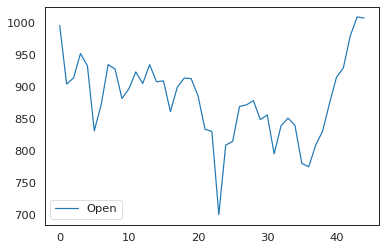

In [ ]:
dd.reset_index().drop(columns = ['Date']).head(days_back-shift).plot(label='actual')


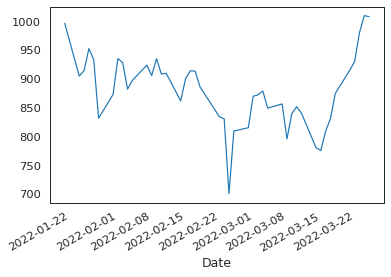

In [ ]:
dd.head(days_back-shift).plot(label = 'actual')

In [ ]:
dd.reset_index().drop(columns = ['Date'])

,Open
0,996.3400
1,904.7600
2,914.2000
3,952.4300
4,933.3600
5,831.5600
6,872.7100
7,935.2100
8,928.1800
9,882.0000


In [ ]:
xxx.astype(int)

,level_0,index,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,...,G,PCOR,TEMN.SW,DAVA,COUP,GTLB,FIVN,ASAN,IS,AAPL
0,0,0,1,2,1,4,2,-1,4,1,...,2,2,-1,4,-2,0,1,0,1,1
1,1,1,1,0,0,6,0,2,0,2,...,0,1,0,1,1,1,-1,-3,0,1
2,2,2,0,0,-1,-1,-1,-1,0,0,...,1,0,-1,2,0,0,3,-3,-1,1
3,3,3,-1,0,-1,1,-1,0,0,4,...,-1,0,2,-1,1,-1,1,6,6,1
4,4,4,-2,-1,-2,-3,-3,-1,2,-1,...,1,-3,0,-11,-5,-3,-1,-5,-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,7579,7579,8,6,8,14,13,9,4,4,...,2,18,-1,5,12,10,18,27,1,7
7580,7580,7580,1,1,2,0,2,3,-1,1,...,2,0,1,3,1,-3,0,-1,1,1
7581,7581,7581,2,0,1,1,2,2,1,0,...,2,-3,1,1,0,1,2,-2,1,1
7582,7582,7582,-2,-1,-4,-4,-2,-3,-1,-2,...,-1,-4,-6,-17,-4,-11,-5,-7,1,-1


In [ ]:
y.astype(int)

0       2
1      -4
2       1
3       1
4       1
       ..
6044    0
6045   -1
6046    0
6047    0
6048    1
Name: y, Length: 6049, dtype: int64

In [ ]:
ff=[]
for xxc in y:
  ff.append(int(xxc))
ff

[2,
 -4,
 1,
 1,
 1,
 2,
 0,
 0,
 -1,
 -2,
 -3,
 0,
 2,
 0,
 -2,
 1,
 -1,
 -2,
 -1,
 -1,
 1,
 1,
 -1,
 2,
 0,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 2,
 -3,
 1,
 0,
 1,
 1,
 1,
 0,
 -1,
 -2,
 -3,
 0,
 1,
 0,
 -5,
 2,
 0,
 -1,
 -2,
 -2,
 1,
 -1,
 -2,
 1,
 0,
 -1,
 0,
 0,
 0,
 -2,
 -2,
 1,
 2,
 -2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 -1,
 -5,
 -1,
 1,
 0,
 -2,
 2,
 0,
 -1,
 -2,
 -2,
 3,
 -1,
 -3,
 0,
 0,
 -1,
 1,
 -1,
 1,
 -3,
 -2,
 0,
 3,
 -3,
 1,
 0,
 2,
 1,
 0,
 -1,
 -1,
 -2,
 -2,
 -1,
 2,
 -1,
 -2,
 1,
 0,
 -2,
 -3,
 -5,
 4,
 -2,
 0,
 3,
 -1,
 0,
 2,
 -1,
 1,
 -2,
 -2,
 0,
 2,
 -7,
 2,
 -1,
 2,
 4,
 6,
 -1,
 1,
 -3,
 -5,
 -5,
 1,
 3,
 -7,
 3,
 0,
 -4,
 -1,
 -5,
 3,
 0,
 -2,
 2,
 0,
 0,
 2,
 2,
 1,
 -4,
 -3,
 -2,
 7,
 -9,
 -1,
 2,
 2,
 2,
 0,
 -1,
 -1,
 -3,
 -5,
 -3,
 2,
 0,
 -6,
 2,
 -1,
 -4,
 -5,
 -1,
 5,
 -1,
 1,
 3,
 4,
 -1,
 1,
 6,
 1,
 -4,
 -4,
 2,
 3,
 -1,
 0,
 -1,
 2,
 -1,
 2,
 -1,
 0,
 -1,
 -3,
 0,
 2,
 -1,
 -3,
 3,
 -2,
 0,
 -2,
 -4,
 4,
 0,
 -5,
 0,
 3,
 0,
 -1,
 0,
 2,
 -3,
 -2,
 0,
 3,

In [ ]:
xxx

,level_0,index,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,...,G,PCOR,TEMN.SW,DAVA,COUP,GTLB,FIVN,ASAN,IS,AAPL
0,0,0.0000,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,...,2.0000,2.0000,-1.0000,4.0000,-2.0000,0.0000,1.0000,-0.0000,1.0000,1.0000
1,1,1.0000,1.0000,0.0000,0.0000,6.0000,-0.0000,2.0000,-0.0000,2.0000,...,-0.0000,1.0000,-0.0000,1.0000,1.0000,1.0000,-1.0000,-3.0000,0.0000,1.0000
2,2,2.0000,0.0000,0.0000,-1.0000,-1.0000,-1.0000,-1.0000,-0.0000,-0.0000,...,1.0000,-0.0000,-1.0000,2.0000,0.0000,-0.0000,3.0000,-3.0000,-1.0000,1.0000
3,3,3.0000,-1.0000,-0.0000,-1.0000,1.0000,-1.0000,0.0000,-0.0000,4.0000,...,-1.0000,-0.0000,2.0000,-1.0000,1.0000,-1.0000,1.0000,6.0000,6.0000,1.0000
4,4,4.0000,-2.0000,-1.0000,-2.0000,-3.0000,-3.0000,-1.0000,2.0000,-1.0000,...,1.0000,-3.0000,0.0000,-11.0000,-5.0000,-3.0000,-1.0000,-5.0000,-7.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,7579,7579.0000,8.0000,6.0000,8.0000,14.0000,13.0000,9.0000,4.0000,4.0000,...,2.0000,18.0000,-1.0000,5.0000,12.0000,10.0000,18.0000,27.0000,1.0000,7.0000
7580,7580,7580.0000,1.0000,1.0000,2.0000,0.0000,2.0000,3.0000,-1.0000,1.0000,...,2.0000,0.0000,1.0000,3.0000,1.0000,-3.0000,0.0000,-1.0000,1.0000,1.0000
7581,7581,7581.0000,2.0000,0.0000,1.0000,1.0000,2.0000,2.0000,1.0000,0.0000,...,2.0000,-3.0000,1.0000,1.0000,-0.0000,1.0000,2.0000,-2.0000,1.0000,1.0000
7582,7582,7582.0000,-2.0000,-1.0000,-4.0000,-4.0000,-2.0000,-3.0000,-1.0000,-2.0000,...,-1.0000,-4.0000,-6.0000,-17.0000,-4.0000,-11.0000,-5.0000,-7.0000,1.0000,-1.0000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xxx, yy, test_size=0.2)
clf=RandomForestClassifier(n_estimators=num_trees)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('random forest score = '+str(metrics.accuracy_score(y_test, y_pred)))

ValueError: ignored

In [ ]:
X_train

,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,BABA,...,A5SA.F,GOEV,RIDE,CENN,REE,SEV,SOLO,FUV,MULN,AAPL
5573,1.0000,1.0000,2.0000,0.0000,2.0000,3.0000,-1.0000,1.0000,-0.0000,0.0000,...,3.0000,-1.0000,3.0000,5.0000,-1.0000,-5.0000,-3.0000,12.0000,-3.0000,1.0000
7283,0.0000,1.0000,2.0000,2.0000,1.0000,-1.0000,-0.0000,-0.0000,-1.0000,1.0000,...,1.0000,3.0000,1.0000,-3.0000,1.0000,9.0000,-3.0000,-2.0000,-20.0000,1.0000
7564,2.0000,2.0000,3.0000,4.0000,4.0000,5.0000,3.0000,11.0000,0.0000,14.0000,...,10.0000,1.0000,6.0000,8.0000,-2.0000,-1.0000,3.0000,2.0000,7.0000,2.0000
6198,2.0000,2.0000,3.0000,3.0000,7.0000,1.0000,4.0000,3.0000,0.0000,2.0000,...,-0.0000,6.0000,6.0000,6.0000,0.0000,3.0000,8.0000,3.0000,-4.0000,3.0000
6826,-2.0000,-1.0000,-2.0000,-3.0000,-3.0000,-1.0000,2.0000,-1.0000,-0.0000,0.0000,...,5.0000,-5.0000,-5.0000,-4.0000,20.0000,-9.0000,-4.0000,-4.0000,-4.0000,-2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,-0.0000,-0.0000,-0.0000,0.0000,-1.0000,-2.0000,-2.0000,1.0000,-1.0000,2.0000,...,-4.0000,-5.0000,-4.0000,-9.0000,-4.0000,-4.0000,-2.0000,-1.0000,-5.0000,-1.0000
2937,-3.0000,-4.0000,-5.0000,-6.0000,-6.0000,-7.0000,-4.0000,-3.0000,0.0000,-1.0000,...,1.0000,0.0000,-3.0000,21.0000,-2.0000,-6.0000,3.0000,9.0000,38.0000,-2.0000
1296,0.0000,0.0000,-1.0000,-0.0000,4.0000,3.0000,1.0000,1.0000,0.0000,3.0000,...,7.0000,2.0000,6.0000,4.0000,-2.0000,5.0000,6.0000,2.0000,-15.0000,0.0000
3903,-2.0000,-1.0000,-4.0000,-4.0000,-2.0000,-3.0000,-1.0000,-2.0000,1.0000,-4.0000,...,-6.0000,-6.0000,-9.0000,-7.0000,-14.0000,-5.0000,-8.0000,-4.0000,-8.0000,-1.0000


In [ ]:
clean_dataset(X_train)

,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,BABA,...,A5SA.F,GOEV,RIDE,CENN,REE,SEV,SOLO,FUV,MULN,AAPL
5690,-2.0000,-2.0000,-3.0000,-1.0000,-5.0000,-2.0000,-3.0000,-1.0000,0.0000,-3.0000,...,1.0000,-4.0000,-9.0000,-4.0000,6.0000,2.0000,-3.0000,-1.0000,-2.0000,-1.0000
5314,-1.0000,1.0000,-0.0000,4.0000,1.0000,1.0000,-0.0000,-1.0000,1.0000,-2.0000,...,5.0000,2.0000,4.0000,-12.0000,1.0000,10.0000,10.0000,0.0000,2.0000,-1.0000
1856,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,3.0000,1.0000,2.0000,...,2.0000,6.0000,5.0000,1.0000,3.0000,-2.0000,4.0000,-1.0000,-8.0000,2.0000
1767,-0.0000,-1.0000,-1.0000,-5.0000,-3.0000,-0.0000,-2.0000,1.0000,0.0000,-0.0000,...,5.0000,-0.0000,1.0000,-0.0000,-5.0000,3.0000,-1.0000,1.0000,-5.0000,-0.0000
6587,-2.0000,-1.0000,-4.0000,-4.0000,-2.0000,-3.0000,-1.0000,-2.0000,1.0000,-4.0000,...,-6.0000,-6.0000,-9.0000,-7.0000,-14.0000,-5.0000,-8.0000,-4.0000,-8.0000,-1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,-1.0000,-1.0000,-2.0000,0.0000,-1.0000,0.0000,-2.0000,3.0000,-1.0000,-1.0000,...,-2.0000,2.0000,2.0000,2.0000,-3.0000,3.0000,-1.0000,11.0000,1.0000,1.0000
4972,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,3.0000,0.0000,5.0000,...,8.0000,-0.0000,3.0000,-5.0000,1.0000,1.0000,-2.0000,-0.0000,6.0000,1.0000
2069,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,1.0000,1.0000,...,-2.0000,-2.0000,3.0000,5.0000,-1.0000,14.0000,2.0000,4.0000,3.0000,2.0000
5038,0.0000,1.0000,2.0000,2.0000,1.0000,-1.0000,-0.0000,-0.0000,-1.0000,1.0000,...,1.0000,3.0000,1.0000,-3.0000,1.0000,9.0000,-3.0000,-2.0000,-20.0000,1.0000


In [ ]:
print(np.any(np.isnan(y)))
print(np.all(np.isfinite(y)))


False
False


In [ ]:
xxx

,index,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,...,A5SA.F,GOEV,RIDE,CENN,REE,SEV,SOLO,FUV,MULN,AAPL
0,0,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,3.0000,0.0000,...,8.0000,-0.0000,3.0000,-5.0000,1.0000,1.0000,-2.0000,-0.0000,6.0000,1.0000
1,1,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,1.0000,...,-2.0000,-2.0000,3.0000,5.0000,-1.0000,14.0000,2.0000,4.0000,3.0000,1.0000
2,2,1.0000,0.0000,0.0000,6.0000,-0.0000,2.0000,-0.0000,2.0000,0.0000,...,7.0000,2.0000,4.0000,-5.0000,23.0000,-3.0000,-2.0000,-2.0000,0.0000,1.0000
3,3,0.0000,0.0000,-1.0000,-1.0000,-1.0000,-1.0000,-0.0000,-0.0000,-2.0000,...,3.0000,-4.0000,-7.0000,14.0000,-9.0000,-5.0000,-5.0000,-6.0000,-5.0000,1.0000
4,4,-1.0000,-0.0000,-1.0000,1.0000,-1.0000,0.0000,-0.0000,4.0000,-1.0000,...,-4.0000,6.0000,1.0000,-5.0000,1.0000,6.0000,9.0000,3.0000,3.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,8795,0.0000,0.0000,-1.0000,-0.0000,4.0000,3.0000,1.0000,1.0000,0.0000,...,7.0000,2.0000,6.0000,4.0000,-2.0000,5.0000,6.0000,2.0000,-15.0000,0.0000
8602,8796,-1.0000,-1.0000,0.0000,-0.0000,-1.0000,-0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,-1.0000,-6.0000,-2.0000,-5.0000,0.0000,-1.0000,-7.0000,-1.0000
8603,8797,0.0000,1.0000,2.0000,2.0000,1.0000,-1.0000,-0.0000,-0.0000,-1.0000,...,1.0000,3.0000,1.0000,-3.0000,1.0000,9.0000,-3.0000,-2.0000,-20.0000,1.0000
8604,8798,0.0000,-1.0000,-1.0000,2.0000,6.0000,0.0000,2.0000,1.0000,-1.0000,...,5.0000,2.0000,7.0000,1.0000,5.0000,5.0000,4.0000,4.0000,-7.0000,1.0000


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
xxx = clean_dataset(xx).reset_index()
yy = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index')
yy = yy['y']
xxx = pd.merge(y.reset_index(),clean_dataset(xxx).reset_index(), on = 'index').drop(columns = ['y','index','level_0'])

In [ ]:
yy

0      -1.0000
1       2.0000
2      -4.0000
3       1.0000
4       1.0000
         ...  
8225   -3.0000
8226   -5.0000
8227   12.0000
8228    9.0000
8229   -9.0000
Name: y, Length: 8230, dtype: float64

In [ ]:
xxx

,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,BABA,...,A5SA.F,GOEV,RIDE,CENN,REE,SEV,SOLO,FUV,MULN,AAPL
0,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,3.0000,0.0000,5.0000,...,8.0000,-0.0000,3.0000,-5.0000,1.0000,1.0000,-2.0000,-0.0000,6.0000,1.0000
1,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,1.0000,1.0000,...,-2.0000,-2.0000,3.0000,5.0000,-1.0000,14.0000,2.0000,4.0000,3.0000,1.0000
2,1.0000,0.0000,0.0000,6.0000,-0.0000,2.0000,-0.0000,2.0000,0.0000,2.0000,...,7.0000,2.0000,4.0000,-5.0000,23.0000,-3.0000,-2.0000,-2.0000,0.0000,1.0000
3,0.0000,0.0000,-1.0000,-1.0000,-1.0000,-1.0000,-0.0000,-0.0000,-2.0000,-2.0000,...,3.0000,-4.0000,-7.0000,14.0000,-9.0000,-5.0000,-5.0000,-6.0000,-5.0000,1.0000
4,-1.0000,-0.0000,-1.0000,1.0000,-1.0000,0.0000,-0.0000,4.0000,-1.0000,9.0000,...,-4.0000,6.0000,1.0000,-5.0000,1.0000,6.0000,9.0000,3.0000,3.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,1.0000,1.0000,3.0000,5.0000,3.0000,3.0000,1.0000,-1.0000,0.0000,1.0000,...,-2.0000,3.0000,17.0000,9.0000,10.0000,7.0000,9.0000,4.0000,16.0000,1.0000
8226,1.0000,3.0000,2.0000,7.0000,-1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,...,4.0000,1.0000,5.0000,3.0000,-4.0000,15.0000,-0.0000,2.0000,11.0000,2.0000
8227,-0.0000,-0.0000,-0.0000,2.0000,-2.0000,0.0000,-1.0000,2.0000,-0.0000,1.0000,...,-1.0000,-2.0000,3.0000,12.0000,2.0000,-8.0000,8.0000,-4.0000,-4.0000,1.0000
8228,2.0000,1.0000,-0.0000,0.0000,8.0000,2.0000,1.0000,-1.0000,0.0000,2.0000,...,3.0000,1.0000,6.0000,-7.0000,-4.0000,-1.0000,1.0000,0.0000,-5.0000,2.0000


In [ ]:
y

0      -1.0000
1       2.0000
2      -4.0000
3       1.0000
4       1.0000
         ...  
8411   -1.0000
8412    1.0000
8413   -1.0000
8414    3.0000
8415   -1.0000
Name: y, Length: 8416, dtype: float64

In [ ]:
y.append(qq[tech['ticker'][x]].iloc[-1*days_back:]).shift(shift).drop(0)


In [ ]:
ss[0].iloc[-1*days_back*2:].shift(-days_back)

In [ ]:
pieces[0]

NameError: ignored

In [ ]:
y.iloc[:-days_back]

In [ ]:
xx.iloc[-days_back:]

In [ ]:
y.head(20)

In [ ]:
xt['AAPL']

In [ ]:
xx

In [ ]:
xx

In [ ]:
df_finalll

In [ ]:
xt = xxx.head(days_back)
yt = xxx.iloc[days_back:days_back*2][ticker.upper()]
yt = yt.reset_index().drop(columns = 'index')
df_compare_rf = pd.DataFrame()
df_compare_rf['prediction'] = list(clf.predict(xt))
df_compare_rf['actual'] = yt
df_compare_rf['dif'] = abs(df_compare_rf['actual']-df_compare_rf['prediction'])
dd = len(df_compare_rf[df_compare_rf['dif']==0])
accuracy = dd/len(df_compare_rf)*100
print('rf forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracy))
msft = yf.Ticker(ticker)
df = msft.history(period="max")
dd = df['Open'].iloc[int(len(df))-days_back:]
df_ = {'open':[]}
for x in range(len(dd)):
  df_['open'].append(int(dd[x]))

df_final = pd.DataFrame()
df_final[str(ticker.upper())+' actual'] = df_['open'] - df_compare_rf['actual']
df_final[str(ticker.upper())+' prediction'] = df_['open'] - df_compare_rf['prediction']
x1 = df_final[str(ticker.upper())+' actual']
y1 = df_final[str(ticker.upper())+' prediction']




xtt = xxx.head(days_back)
ytt = xxx.iloc[days_back:days_back*2][ticker.upper()]
ytt = ytt.reset_index().drop(columns = 'index')
df_compare_xgb = pd.DataFrame()
df_compare_xgb['prediction'] = list(xgb_clf.predict(xt))
df_compare_xgb['actual'] = ytt
df_compare_xgb['dif'] = abs(df_compare_xgb['actual']-df_compare_xgb['prediction'])
ddd = len(df_compare_xgb[df_compare_xgb['dif']==0])
accuracyy = ddd/len(df_compare_xgb)*100
print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyy))
msftt = yf.Ticker(ticker)
dff = msftt.history(period="max")
ddd = dff['Open'].iloc[int(len(dff))-days_back:]
df__ = {'open':[]}
for x in range(len(ddd)):
  df__['open'].append(int(ddd[x]))

df_final_xgb = pd.DataFrame()
df_final_xgb[str(ticker.upper())+' actual'] = df_['open'] - df_compare_xgb['actual']
df_final_xgb[str(ticker.upper())+' prediction'] = df_['open'] - df_compare_xgb['prediction']
x11 = df_final_xgb[str(ticker.upper())+' prediction']





xttt = xxx.head(days_back)
yttt = xxx.iloc[days_back:days_back*2][ticker.upper()]
yttt = yttt.reset_index().drop(columns = 'index')
df_compare_gb = pd.DataFrame()
df_compare_gb['prediction'] = list(xgb_clf.predict(xt))
df_compare_gb['actual'] = ytt
df_compare_gb['dif'] = abs(df_compare_gb['actual']-df_compare_gb['prediction'])
dddd = len(df_compare_gb[df_compare_gb['dif']==0])
accuracyyy = dddd/len(df_compare_gb)*100
print('xgb forest accuracy for last '+str(shift)+' '+ticker+' '+str(accuracyyy))
msfttt = yf.Ticker(ticker)
dfff = msfttt.history(period="max")
dddd = dfff['Open'].iloc[int(len(dfff))-days_back:]
df___ = {'open':[]}
for x in range(len(dddd)):
  df___['open'].append(int(dddd[x]))

df_finalll = pd.DataFrame()
df_finalll[str(ticker.upper())+' actual'] = df___['open'] - df_compare_gb['actual']
df_finalll[str(ticker.upper())+' prediction'] = df___['open'] - df_compare_gb['prediction']
x111 = df_finalll[str(ticker.upper())+' prediction']




x = df_final[str(ticker.upper())+' prediction']
ax = x.head(20).plot(label='rf prediction')
ax = x1.head(20).plot(label='actual')
ax = x11.head(20).plot(label='xgb prediction')
ax = x111.head(20).plot(label='gb prediction')

ax.set_xlabel('Date')
ax.set_ylabel(str(ticker))
plt.legend()
plt.show()


In [ ]:
df_compare_gb['actual'] = ytt

In [ ]:
df_compare_gb['actual']

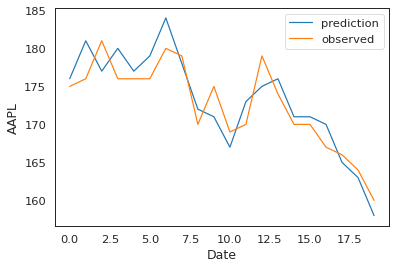

In [ ]:
dd

Date
2021-12-27   176.8647
2021-12-28   179.9308
2021-12-29   179.1018
2021-12-30   179.2416
2021-12-31   177.8634
2022-01-03   177.6037
2022-01-04   182.3976
2022-01-05   179.3815
2022-01-06   172.4802
2022-01-07   172.6700
2022-01-10   168.8649
2022-01-11   172.1007
2022-01-12   175.8959
2022-01-13   175.5563
2022-01-14   171.1220
2022-01-18   171.2918
2022-01-19   169.7837
2022-01-20   166.7675
2022-01-21   164.2108
2022-01-24   159.8164
2022-01-25   158.7777
2022-01-26   163.2920
2022-01-27   162.2433
2022-01-28   165.4991
2022-01-31   169.9435
2022-02-01   173.7886
2022-02-02   174.5276
2022-02-03   174.2580
2022-02-04   171.6800
2022-02-07   172.8600
2022-02-08   171.7300
2022-02-09   176.0500
2022-02-10   174.1400
2022-02-11   172.3300
2022-02-14   167.3700
2022-02-15   170.9700
2022-02-16   171.8500
2022-02-17   171.0300
2022-02-18   169.8200
2022-02-22   164.9800
2022-02-23   165.5400
2022-02-24   152.5800
2022-02-25   163.8400
2022-02-28   163.0600
2022-03-01   164.7000
2022-

In [ ]:
df_compare_xgb

,prediction,actual,dif
0,-0.0000,1.0000,1.0000
1,-2.0000,1.0000,3.0000
2,2.0000,1.0000,1.0000
3,-1.0000,1.0000,2.0000
4,-0.0000,1.0000,1.0000
5,-2.0000,1.0000,3.0000
6,-2.0000,1.0000,3.0000
7,1.0000,1.0000,0.0000
8,-0.0000,1.0000,1.0000
9,1.0000,1.0000,0.0000


In [ ]:
pred = results.get_prediction(start=start_date,dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label=str(shift*-1)+' Steps ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
              pred_ci.iloc[:, 0],
              pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(str(ticker))
plt.legend()
plt.show()

In [ ]:
import yfinance as yf

# Get the data
data = yf.download(tickers="GZIC", period="5d", interval="1m")

# Print the data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-14 09:30:00-04:00,1.2000,1.4500,1.2000,1.4500,1.4500,0
2022-03-14 09:39:00-04:00,1.4500,1.4500,1.4500,1.4500,1.4500,200
2022-03-14 10:21:00-04:00,1.4500,1.4500,1.4500,1.4500,1.4500,1200
2022-03-14 10:29:00-04:00,1.4500,1.4500,1.4500,1.4500,1.4500,200
2022-03-14 10:36:00-04:00,1.4500,1.4500,1.4500,1.4500,1.4500,800
2022-03-14 10:38:00-04:00,1.4800,1.4800,1.4800,1.4800,1.4800,200
2022-03-14 10:54:00-04:00,1.4400,1.4400,1.4400,1.4400,1.4400,518
2022-03-14 12:12:00-04:00,1.4080,1.4080,1.4080,1.4080,1.4080,260
2022-03-14 13:31:00-04:00,1.4000,1.4000,1.4000,1.4000,1.4000,2906


In [ ]:
x.iloc[0:50]

,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,BABA,...,AVLR,IOT,GTLB,TEMN.SW,PLAN,MNDY,IS,DAVA,FIVN,AAPL
0,2.0000,2.0000,3.0000,2.0000,7.0000,3.0000,3.0000,-1.0000,2.0000,-0.0000,...,-0.0000,-1.0000,7.0000,2.0000,3.0000,5.0000,4.0000,-1.0000,3.0000,1.0000
1,-3.0000,-2.0000,-3.0000,-7.0000,-9.0000,-1.0000,-3.0000,-2.0000,-1.0000,-2.0000,...,-5.0000,-7.0000,-6.0000,-0.0000,-6.0000,-4.0000,-0.0000,-1.0000,-2.0000,1.0000
2,1.0000,0.0000,1.0000,2.0000,-1.0000,0.0000,0.0000,-0.0000,2.0000,2.0000,...,6.0000,-3.0000,13.0000,-0.0000,3.0000,10.0000,2.0000,5.0000,6.0000,1.0000
3,-0.0000,1.0000,0.0000,-1.0000,2.0000,-1.0000,-1.0000,-0.0000,-1.0000,-3.0000,...,-2.0000,5.0000,9.0000,-1.0000,-0.0000,6.0000,-0.0000,2.0000,4.0000,1.0000
4,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,3.0000,0.0000,5.0000,...,2.0000,5.0000,2.0000,-2.0000,3.0000,4.0000,4.0000,2.0000,0.0000,1.0000
5,1.0000,2.0000,1.0000,4.0000,2.0000,-1.0000,4.0000,1.0000,1.0000,1.0000,...,-1.0000,5.0000,0.0000,-1.0000,0.0000,-0.0000,1.0000,4.0000,1.0000,1.0000
6,1.0000,0.0000,0.0000,6.0000,-0.0000,2.0000,-0.0000,2.0000,0.0000,2.0000,...,-3.0000,2.0000,1.0000,-0.0000,1.0000,-1.0000,0.0000,1.0000,-1.0000,1.0000
7,0.0000,0.0000,-1.0000,-1.0000,-1.0000,-1.0000,-0.0000,-0.0000,-2.0000,-2.0000,...,-1.0000,-2.0000,-0.0000,-1.0000,-1.0000,1.0000,-1.0000,2.0000,3.0000,1.0000
8,-1.0000,-0.0000,-1.0000,1.0000,-1.0000,0.0000,-0.0000,4.0000,-1.0000,9.0000,...,3.0000,-2.0000,-1.0000,2.0000,2.0000,0.0000,6.0000,-1.0000,1.0000,1.0000
9,-2.0000,-1.0000,-2.0000,-3.0000,-3.0000,-1.0000,2.0000,-1.0000,-0.0000,0.0000,...,-4.0000,-8.0000,-3.0000,0.0000,-2.0000,-4.0000,-7.0000,-11.0000,-1.0000,1.0000


In [ ]:
y

0        2.0000
1       -4.0000
2        1.0000
3        1.0000
4        1.0000
          ...  
22195   18.0000
22196    0.0000
22197    2.0000
22198   -5.0000
22199   -5.0000
Name: y, Length: 22200, dtype: float64

In [ ]:
df_compare_rf

,prediction,actual,dif
0,2.0000,1.0000,1.0000
1,-4.0000,-1.0000,3.0000
2,1.0000,-2.0000,3.0000
3,1.0000,-1.0000,2.0000
4,1.0000,-1.0000,2.0000
5,2.0000,1.0000,1.0000
6,0.0000,1.0000,1.0000
7,0.0000,-1.0000,1.0000
8,-1.0000,2.0000,3.0000
9,-2.0000,0.0000,2.0000


In [ ]:
df_compare_xgb

,prediction,actual,dif
0,1.0000,1.0000,0.0000
1,-1.0000,-1.0000,0.0000
2,1.0000,-2.0000,3.0000
3,1.0000,-1.0000,2.0000
4,1.0000,-1.0000,2.0000
5,1.0000,1.0000,0.0000
6,-0.0000,1.0000,1.0000
7,-0.0000,-1.0000,1.0000
8,-1.0000,2.0000,3.0000
9,-1.0000,0.0000,1.0000


In [ ]:

xt = x.head(50)
yt = x.iloc[52:101][ticker.upper()]
yt = yt.reset_index().drop(columns = 'index')
df_compare = pd.DataFrame()
df_compare['prediction'] = list(xgb_clf.predict(xt))
df_compare['actual'] = yt
df_compare['dif'] = abs(df_compare['actual']-df_compare['prediction'])
dd = len(df_compare[df_compare['dif']==0])
accuracy = dd/len(df_compare)*100
print(accuracy)
df_compare.head(50)


ValueError: ignored

In [ ]:
xx

,MSFT,GOOG,AMZN,TSLA,NVDA,FB,TSM,TCEHY,005930.KS,BABA,...,LVLU,CSPR,ALLD3.SA,HOUR,OG,NHTC,WBEV,PIK,KSPN,AAPL
0,-0.0000,-1.0000,-1.0000,-5.0000,-3.0000,-0.0000,-2.0000,1.0000,0.0000,-0.0000,...,0.0000,-0.0000,2.0000,78.0000,-3.0000,1.0000,-10.0000,1.0000,-2.0000,1.0000
1,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,3.0000,1.0000,2.0000,...,0.0000,2.0000,-2.0000,3.0000,-1.0000,-2.0000,2.0000,33.0000,-8.0000,1.0000
2,-0.0000,0.0000,-1.0000,3.0000,-0.0000,-1.0000,1.0000,0.0000,-1.0000,1.0000,...,-1.0000,1.0000,1.0000,-13.0000,11.0000,-2.0000,-4.0000,2.0000,5.0000,1.0000
3,-5.0000,-2.0000,-2.0000,-7.0000,-6.0000,-3.0000,-1.0000,-3.0000,-2.0000,-3.0000,...,-4.0000,-4.0000,-5.0000,-2.0000,-5.0000,1.0000,-4.0000,-11.0000,5.0000,1.0000
4,1.0000,-1.0000,-1.0000,-5.0000,-3.0000,-0.0000,-2.0000,1.0000,0.0000,-0.0000,...,0.0000,-0.0000,2.0000,78.0000,-3.0000,1.0000,-10.0000,1.0000,-2.0000,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,-5.0000,-2.0000,-2.0000,-7.0000,-6.0000,-3.0000,-1.0000,-3.0000,-2.0000,-3.0000,...,-4.0000,-4.0000,-5.0000,-2.0000,-5.0000,1.0000,-4.0000,1.0000,5.0000,-2.0000
2108,-0.0000,-1.0000,-1.0000,-5.0000,-3.0000,-0.0000,-2.0000,1.0000,0.0000,-0.0000,...,0.0000,-0.0000,2.0000,78.0000,-3.0000,1.0000,-10.0000,1.0000,1.0000,-0.0000
2109,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,3.0000,1.0000,2.0000,...,0.0000,2.0000,-2.0000,3.0000,-1.0000,-2.0000,2.0000,33.0000,1.0000,2.0000
2110,-0.0000,0.0000,-1.0000,3.0000,-0.0000,-1.0000,1.0000,0.0000,-1.0000,1.0000,...,-1.0000,1.0000,1.0000,-13.0000,11.0000,-2.0000,-4.0000,2.0000,1.0000,-0.0000


In [ ]:


df_compare = pd.DataFrame()
df_compare['prediction'] = list(clf.predict(X_test))
df_compare['actual'] = y_test.reset_index().drop(columns = 'index')
df_compare.head(50)

,prediction,actual
0,0.0000,0.0000
1,2.0000,2.0000
2,-1.0000,-1.0000
3,1.0000,-0.0000
4,0.0000,0.0000
5,1.0000,1.0000
6,4.0000,4.0000
7,-6.0000,-6.0000
8,1.0000,1.0000
9,-2.0000,-2.0000


In [ ]:
x.head(60)

,MSFT,TSLA,CSCO,ORCL,ADBE,CRM,SAP,INTU,SONY,IBM,...,LASR,VLN,RKLY,SKYT,AIP,AXTI,AEHR,PXLW,QUIK,AAPL
0,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,2.0000,-1.0000,1.0000,0.0000,...,1.0000,-3.0000,-13.0000,-0.0000,1.0000,1.0000,-2.0000,0.0000,1.0000,1.0000
1,1.0000,1.0000,2.0000,0.0000,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,...,0.0000,8.0000,3.0000,7.0000,8.0000,4.0000,2.0000,3.0000,4.0000,1.0000
2,-0.0000,2.0000,-2.0000,-1.0000,1.0000,-1.0000,0.0000,-0.0000,1.0000,1.0000,...,3.0000,-3.0000,15.0000,-2.0000,-8.0000,1.0000,-1.0000,1.0000,4.0000,1.0000
3,-0.0000,-5.0000,1.0000,-0.0000,-3.0000,-1.0000,-1.0000,-1.0000,-1.0000,1.0000,...,-1.0000,-5.0000,-3.0000,-5.0000,2.0000,0.0000,-8.0000,-2.0000,-2.0000,1.0000
4,2.0000,1.0000,2.0000,-2.0000,3.0000,-0.0000,0.0000,1.0000,0.0000,-0.0000,...,-1.0000,-4.0000,-3.0000,-4.0000,-0.0000,-4.0000,-4.0000,-5.0000,-1.0000,1.0000
5,-0.0000,-3.0000,-1.0000,-2.0000,1.0000,-0.0000,-0.0000,-1.0000,-2.0000,-1.0000,...,-3.0000,4.0000,-2.0000,-6.0000,2.0000,-3.0000,-4.0000,-5.0000,-3.0000,1.0000
6,-1.0000,1.0000,-1.0000,-0.0000,-3.0000,-2.0000,-1.0000,-2.0000,0.0000,1.0000,...,1.0000,-2.0000,-1.0000,-4.0000,-9.0000,0.0000,4.0000,-1.0000,-1.0000,1.0000
7,2.0000,2.0000,3.0000,3.0000,2.0000,2.0000,2.0000,0.0000,1.0000,-1.0000,...,-1.0000,7.0000,0.0000,1.0000,6.0000,4.0000,9.0000,7.0000,1.0000,1.0000
8,-3.0000,-7.0000,0.0000,-1.0000,-2.0000,-3.0000,-2.0000,-2.0000,-1.0000,2.0000,...,-4.0000,-4.0000,-5.0000,-8.0000,-13.0000,-5.0000,-10.0000,-6.0000,-7.0000,1.0000
9,1.0000,2.0000,0.0000,-1.0000,-2.0000,1.0000,0.0000,-0.0000,-0.0000,1.0000,...,-2.0000,7.0000,2.0000,1.0000,-9.0000,4.0000,4.0000,2.0000,5.0000,1.0000


In [ ]:
def trees():
  print('Enter the # of categories you want for your x variables')
  num_categories = int(input())
  print('enter the ticker you want to predict in the end:')  
  ticker = input().upper()
  print('do you want a visualization? (yes/no):')
  descriptive = input().lower()
  print('the stocks in your selected categories will be stacked on top of each other for training purposes, how many days back would you like each stock to go? (i.e. 10 days: 10 days of past returns for each stock):')
  days_back = int(input())
  print('how many trees do you want the random forest to have?:')
  num_trees = int(input())
  print('Do you need to scrape companymarketcap.com (yes/no) (only need to do once / runtime):')
  scrape = input().lower()
  print('For each stock, we are predicting returns xx days into the future. How many days would you like to lag your data:')
  shift = int(input())
  start_date = '2021-09-03'
  print('yahoo finance data collection (on/off) (every time you change category selection):')
  setup = input()
  print('Quick setup (on/off):')
  shift_change = input()
  print('run a random forest: (yes/no)')
  random_forest = input()
  print('run a xgboost (yes/no):')
  xgb = input()
  print('run a logit (yes/no):')
  logi_regression = input()
  print('run a gradient boosted (yes/no):')
  gradient_boosted = input()

#------------------------------------------------------

  if descriptive == 'yes':
    msft = yf.Ticker(ticker.upper())
    df = msft.history(period="max")
    df = df.iloc[7000:]
    df = df.reset_index()

    df['date_time'] = df['Date']
    df = df.dropna()
    df['date_time']=pd.to_datetime(df['date_time']) 
    df['year'] = df['date_time'].apply(lambda x: x.year)
    df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
    df['month'] = df['date_time'].apply(lambda x: x.month)
    df['day'] = df['date_time'].apply(lambda x: x.day)
    df=df.loc[:,['date_time','Close', 'year','quarter','month','day']]
    df.sort_values('date_time', inplace=True, ascending=True)
    df = df.reset_index(drop=True)
    df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
    df["weekday"] = (df["weekday"] < 5).astype(int)
    print('Number of rows and columns after removing missing values:', df.shape)
    print('The time series starts from: ', df.date_time.min())
    print('The time series ends on: ', df.date_time.max())

    stat, p = stats.normaltest(df.Close)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

    sns.distplot(df.Close);
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Close)))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Close)))

    df1=df.loc[:,['date_time','Close']]
    df1.set_index('date_time',inplace=True)
    df1.plot(figsize=(12,5))
    plt.ylabel(str(ticker))
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.title('Time Series')
    sns.despine(top=True)
    plt.show();

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="year", y="Close", data=df)
    plt.xlabel('year')
    plt.title('Box plot of MSFT stock')
    sns.despine(left=True)
    plt.tight_layout()
    plt.subplot(1,2,2)
    sns.boxplot(x="quarter", y="Close", data=df)
    plt.xlabel('quarter')
    plt.title('Box plot of Quarterly Stock Closing Prices')
    sns.despine(left=True)
    plt.tight_layout();

    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df['Close'].hist(bins=50)
    plt.title('Closing Price Distribution')
    plt.subplot(1,2,2)
    stats.probplot(df['Close'], plot=plt);
    df1.describe().T

    fig = plt.figure(figsize=(18,16))
    fig.subplots_adjust(hspace=.4)
    ax1 = fig.add_subplot(5,1,1)
    ax1.plot(df1['Close'].resample('D').mean(),linewidth=1)
    ax1.set_title('Mean Closing Price resampled over day')
    ax1.tick_params(axis='both', which='major')

    ax2 = fig.add_subplot(5,1,2, sharex=ax1)
    ax2.plot(df1['Close'].resample('W').mean(),linewidth=1)
    ax2.set_title('Mean Closing Price power resampled over week')
    ax2.tick_params(axis='both', which='major')

    ax3 = fig.add_subplot(5,1,3, sharex=ax1)
    ax3.plot(df1['Close'].resample('M').mean(),linewidth=1)
    ax3.set_title('Mean Closing Price resampled over month')
    ax3.tick_params(axis='both', which='major')

    ax4  = fig.add_subplot(5,1,4, sharex=ax1)
    ax4.plot(df1['Close'].resample('Q').mean(),linewidth=1)
    ax4.set_title('Mean Closing Price over quarter')
    ax4.tick_params(axis='both', which='major')

    ax5  = fig.add_subplot(5,1,5, sharex=ax1)
    ax5.plot(df1['Close'].resample('A').mean(),linewidth=1)
    ax5.set_title('Mean Closing Price resampled over year')
    ax5.tick_params(axis='both', which='major');

    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    df.groupby('year').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Year')

    plt.subplot(2,2,2)
    df.groupby('quarter').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Quarter')

    plt.subplot(2,2,3)
    df.groupby('month').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Month')

    plt.subplot(2,2,4)
    df.groupby('day').Close.agg('mean').plot()
    plt.xlabel('')
    plt.title('Mean Closing Price by Day');


    pd.pivot_table(df.loc[df['year'] != 2013], values = "Close", 
                  columns = "year", index = "month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

    dic={0:'Weekend',1:'Weekday'}
    df['Day'] = df.weekday.map(dic)
    a=plt.figure(figsize=(9,4)) 
    plt1=sns.boxplot('year','Close',hue='Day',width=0.6,fliersize=3,
                        data=df)                                                                                                                                                                                                                                                                                                                                                 
    a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    sns.despine(left=True, bottom=True) 
    plt.xlabel('')
    plt.tight_layout()                                                                                                                  
    plt.legend().set_visible(False);

    plt1=sns.factorplot('year','Close',hue='Day',
                        data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
    plt.title('Factor Plot of Closign Price by Weekend/Weekday')                                                             
    plt.tight_layout()                                                                                                                  
    sns.despine(left=True, bottom=True) 
    plt.legend(loc='upper right');
  else:
    print('no visualization')

  if scrape == 'yes':
    urls = [
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/automakers/largest-automakers-by-market-cap/',
      'https://companiesmarketcap.com/airlines/largest-airlines-by-market-cap/',
      'https://companiesmarketcap.com/airports/largest-airport-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/aircraft-manufacturers/largest-aircraft-manufacturers-by-market-cap/',
      'https://companiesmarketcap.com/banks/largest-banks-by-market-cap/',
      'https://companiesmarketcap.com/hotels/largest-hotel-companies-by-market-cap/',
      'https://companiesmarketcap.com/pharmaceuticals/largest-pharmaceutical-companies-by-market-cap/',
      'https://companiesmarketcap.com/e-commerce/largest-e-commerce-companies-by-market-cap/',
      'https://companiesmarketcap.com/healthcare/largest-healthcare-companies-by-market-cap/',
      'https://companiesmarketcap.com/ports/largest-port-operating-companies-by-market-cap/',
      'https://companiesmarketcap.com/professional-services/largest-professional-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/food/largest-food-companies-by-market-cap/',
      'https://companiesmarketcap.com/restaurant-chains/largest-restaurant-chain-companies-by-market-cap/',
      'https://companiesmarketcap.com/software/largest-software-companies-by-market-cap/',
      'https://companiesmarketcap.com/semiconductors/largest-semiconductor-companies-by-market-cap/',
      'https://companiesmarketcap.com/tobacco/largest-tobacco-companies-by-market-cap/',
      'https://companiesmarketcap.com/financial-services/largest-financial-service-companies-by-market-cap/',
      'https://companiesmarketcap.com/oil-gas/largest-oil-and-gas-companies-by-market-cap/',
      'https://companiesmarketcap.com/electricity/largest-electricity-companies-by-market-cap/',
      'https://companiesmarketcap.com/delivery-services/largest-delivery-companies-by-market-cap/',
      'https://companiesmarketcap.com/media-press/largest-media-and-press-companies-by-market-cap/',
      'https://companiesmarketcap.com/alcoholic-beverages/largest-alcoholic-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/beverages/largest-beverage-companies-by-market-cap/',
      'https://companiesmarketcap.com/clothing/largest-clothing-companies-by-market-cap/',
      'https://companiesmarketcap.com/mining/largest-mining-companies-by-market-cap/',
      'https://companiesmarketcap.com/railways/largest-railways-companies-by-market-cap/',
      'https://companiesmarketcap.com/insurance/largest-insurance-companies-by-market-cap/',
      'https://companiesmarketcap.com/real-estate/largest-real-estate-companies-by-market-cap/',
      'https://companiesmarketcap.com/chemicals/largest-chemical-companies-by-market-cap/',
      'https://companiesmarketcap.com/investment/largest-investment-companies-by-market-cap/',
      'https://companiesmarketcap.com/telecommunication/largest-telecommunication-companies-by-market-cap/',
      'https://companiesmarketcap.com/retail/largest-retail-companies-by-market-cap/',
      'https://companiesmarketcap.com/internet/largest-internet-companies-by-market-cap/',
      'https://companiesmarketcap.com/construction/largest-construction-companies-by-market-cap/',
      'https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/'
    ]
    a = []
    for x in range(len(urls)):
        a.append(urls[x].split('/')[3])
    a

    import requests
    import time
    import bs4
    from bs4 import BeautifulSoup
    cats = ['automakers','airlines','aircraft-manufacturers','banks','pharmaceuticals','e-commerce','healthcare','ports','professional-services','food','restaurant-chains','software','semiconductors','tobacco','financial-services','electricity','courier-services','media/press','alcoholic-beverages','beverages','clothing','mining','railways','insurance','real-estate','chemicals','investment','telecomunication','retail','internet','construction','tech']
    cat_names = {'category':[],'names':[],'ticker':[]}
    try:
        for x in range(len(urls)):
            url = urls[x]
            html = requests.get(url).text
            soup = bs4.BeautifulSoup(html, "html.parser")
            for tag in soup.findAll("div", {"class": "name-div"}):
                    cat_names['names'].append(tag.findNext("div").text)
                    cat_names['category'].append(a[x])
            for tag in soup.findAll("div", {"class": "company-name"}):
                    cat_names['ticker'].append(tag.findNext().text)

    except:
        print(x)
  else:
    print('no scrape')

  if setup == 'on':
    cat_names = pd.DataFrame(cat_names)
    print('enter your industry categories, according to the number you referrenced above')
    gg = []  
    tech = pd.DataFrame()
    cat_holder = []
    for x in range(num_categories):
      x = input()
      cat_holder.append(x)
      tech = (cat_names['ticker'][cat_names['category']==x])
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)
    tech = tech.drop_duplicates()
      

    for x in range(len(tech)):
      try:
          xx  = yf.Ticker(tech.iloc[x])
          df = xx.history(period="max")
          df.columns.values[0] = tech.iloc[x]+" Open"
          df.columns.values[1] = tech.iloc[x]+" High"
          df.columns.values[2] = tech.iloc[x]+" Low"
          df.columns.values[3] = tech.iloc[x]+" Close"
          df.columns.values[4] = tech.iloc[x]+" Volume"
          df.columns.values[5] = tech.iloc[x]+" Dividends"
          df.columns.values[6] = tech.iloc[x]+" Stock Splits"
          tech.iloc[x] = df.reset_index()
      except:
        print(tech.iloc[x])
    

    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    import time
    label_encoder = preprocessing.LabelEncoder()

    msft = yf.Ticker(ticker)
    df = msft.history(period="max")

    for ii in range(len(tech)):
      if len(tech.iloc[ii])>=days_back-shift:
        df = pd.merge(df, tech.iloc[ii] ,on = 'Date')
      else:
        print('not long enough!')
    
    for x in range(num_categories):
      tech = (cat_names['ticker'][cat_names['category']==pd.DataFrame(cat_holder)[0][x]])
      gg.append(tech)
    tech = pd.concat(gg,ignore_index = True)

    tech = tech.reset_index()
    tech = tech.drop(columns = 'index')
    tech = tech.drop_duplicates()
    tech = tech['ticker']
    aa = pd.DataFrame()
    vol = pd.DataFrame()
    ss = []
    for i in range(len(tech)):
      try:
        aa[str(tech.iloc[i])] = (df[str(tech.iloc[i])+' Close']- df[str(tech.iloc[i])+' Open'])/df[str(tech.iloc[i])+' Open']*100
        vol[str(tech.iloc[i])] = df[str(tech.iloc[i])+' Volume']
      except:
        ss.append(str(tech.iloc[i]))
    aa = round(aa)

    tech = pd.DataFrame(tech)

    dd = pd.DataFrame()

    rr = pd.DataFrame()
    for x in range(len(tech)):
      try:
        rr[tech.iloc[x]] = aa[tech.iloc[x]]
      except:
        print(tech.iloc[x])

    qq = pd.DataFrame()
    for x in range(len(tech)):
      try:
        qq[tech.iloc[x]] = aa[tech.iloc[x]]
      except:
        print(tech.iloc[x])



    ss = []
    df = pd.DataFrame()

    for x in range(len(tech)):
      try:
        df = qq.drop(columns = tech['ticker'][x])
        ss.append(df)
      except:
        print(tech['ticker'][x])


    pieces = []
    for x in range(len(tech)):
      try:
        pieces.append(ss[x].iloc[-1*days_back:]).shift(-1*shift).dropna()
      except:
        print(tech['ticker'][x])
    df_final = pd.concat(pieces,axis = False, ignore_index = True)


  else:
        print('no setup')

  if shift_change == 'on':
    y = []
    for x in range(len(tech)):
      try:
        y.append(qq[tech['ticker'][x]].iloc[-1*days_back:]).shift(shift).dropna()
      except:
        print(tech['ticker'][x])
    y = pd.concat(y, ignore_index = True)
    yy =y.reset_index()
    yy = yy.drop(columns = 'index')
    yy[0].loc[~(yy[0]==0)]
    
    yyy = pd.DataFrame()
    yy = yy.dropna()
    yyy['y'] = yy[0]
    yyy = yyy.reset_index()


    tt = round(df_final)
    tt = tt.fillna(1)
    xx = tt.reset_index()
    xx = xx.drop(columns = 'index')
    xx = xx.reset_index()
    
    xxx = pd.merge(yyy,xx, on = 'index')
    y = xxx['y']
    xxx = xxx.drop(columns = ['index','y'])

    x = xxx
    xx = x

    yy = y

    xxx = x
    yyy = y
  else:
    print('no setup')

  if random_forest == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf=RandomForestClassifier(n_estimators=num_trees)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print('random forest score = '+str(metrics.accuracy_score(y_test, y_pred)))
  else:
    print('no random forest')

  if logi_regression == 'yes':
    xx, yy = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

    print('Logistic mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  else:
    print('no logistic regression')

  if gradient_boosted == 'yes':
    X_train, X_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2)

    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(X_train, y_train)

        print("Learning rate: ", learning_rate)
        print("Gradient Boosted Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
        print("Gradient Boosted Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
  else:
    print('no')


  if xgb == 'yes':
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    score = xgb_clf.score(X_test, y_test)
    print('XGB Score = '+str(score))
  else:
    print('no')


  xt = x.head(50)
  yt = x.iloc[52:101][ticker]
  yt = yt.reset_index().drop(columns = 'index')
  df_compare = pd.DataFrame()
  df_compare['prediction'] = list(clf.predict(xt))
  df_compare['actual'] = yt
  df_compare.head(50)

3


In [ ]:
num_iterations = int(input())
for x in range(num_iterations):
  trees()

2
Enter the # of categories you want for your x variables
3
enter the ticker you want to predict in the end:
aapl
do you want a visualization? (yes/no):
no
the stocks in your selected categories will be stacked on top of each other for training purposes, how many days back would you like each stock to go? (i.e. 10 days: 10 days of past returns for each stock):
40
how many trees do you want the random forest to have?:
2000
Do you need to scrape companymarketcap.com (yes/no) (only need to do once / runtime):
yes
For each stock, we are predicting returns xx days into the future. How many days would you like to lag your data:
1
yahoo finance data collection (on/off) (every time you change category selection):
on
Quick setup (on/off):
on
run a random forest: (yes/no)
yes
run a xgboost (yes/no):
yes
run a logit (yes/no):
no
run a gradient boosted (yes/no):
yes
no visualization


NameError: ignored

In [ ]:
import pandas as pd

In [ ]:
if logi_regression == 'yes':
  xx, yy = make_classification(n_samples=100000, n_features=int(len(x.keys())), n_informative=int(len(y.unique())), n_redundant=5, n_classes=int(len(y.unique())), random_state=1)

  model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(xx,yy)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

  print('Logistic mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Logistic mean accuracy: 0.263 (0.013)


In [ ]:
pd.DataFrame(model.predict_proba(x.iloc[-10:]))

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0262,0.0277,0.0049,0.0066,0.0042,0.0157,0.0307,0.0176,0.0087,0.0108,...,0.0075,0.0088,0.0269,0.0325,0.1047,0.0564,0.0021,0.0301,0.0959,0.0075
1,0.0026,0.0279,0.1800,0.0897,0.0069,0.0049,0.0302,0.0006,0.0109,0.0071,...,0.0027,0.0451,0.1525,0.0591,0.0022,0.0083,0.1291,0.0070,0.0136,0.0394
2,0.0358,0.0007,0.0080,0.0015,0.0446,0.0065,0.0692,0.0046,0.0081,0.0057,...,0.0084,0.0368,0.0415,0.0110,0.1207,0.0009,0.0022,0.0351,0.0126,0.0024
3,0.0766,0.0020,0.1917,0.0116,0.0518,0.0627,0.0109,0.0119,0.0085,0.0047,...,0.0161,0.0009,0.0162,0.0176,0.0974,0.0158,0.0021,0.0125,0.0092,0.0077
4,0.0145,0.0113,0.0278,0.0004,0.0021,0.0497,0.0193,0.0828,0.0067,0.0007,...,0.0011,0.0018,0.0082,0.0063,0.1017,0.0271,0.0034,0.0746,0.0663,0.0110
5,0.0338,0.0344,0.0029,0.0190,0.0044,0.0138,0.0018,0.0182,0.0267,0.0465,...,0.0119,0.0311,0.0349,0.0157,0.0014,0.0055,0.1808,0.0102,0.0020,0.0293
6,0.1088,0.0458,0.0178,0.0003,0.0012,0.0013,0.0518,0.0392,0.0033,0.0014,...,0.0283,0.0081,0.0099,0.0283,0.3284,0.0010,0.0055,0.0131,0.0024,0.0078
7,0.0073,0.0408,0.0268,0.0049,0.0014,0.0039,0.1505,0.0154,0.0043,0.0129,...,0.0153,0.0279,0.0144,0.0049,0.0433,0.0032,0.1188,0.0190,0.0190,0.0045
8,0.0031,0.0083,0.0056,0.0164,0.0031,0.0081,0.0056,0.0309,0.0100,0.0153,...,0.0647,0.0427,0.0206,0.0552,0.0828,0.0013,0.0135,0.0091,0.0003,0.0074
9,0.0260,0.0311,0.0050,0.0044,0.0027,0.0108,0.0429,0.0206,0.0087,0.0094,...,0.0089,0.0100,0.0273,0.0375,0.1411,0.0313,0.0017,0.0383,0.0858,0.0058


In [ ]:

model.predict_proba(xxx)


NotFittedError: ignored

In [ ]:
y

1      0.0000
2      0.0000
3      0.0000
4     -0.0000
5     -0.0000
        ...  
835   -0.0000
836   -0.0000
837    0.0000
838    0.0000
839   -0.0000
Length: 838, dtype: float64

In [ ]:
  y = []
  for x in range(len(tech)):
    try:
      y.append(qq[tech[0][x]])
    except:
      print(tech[0][x])
  yy = pd.concat(y, ignore_index = True)

  tt = round(tt)

  x = tt.shift(shift*-1)
  y = yy.shift(shift)

  x = tt.dropna()
  x = x[1:]
  y = y.dropna()


ABNB
SNOW
XIACF
COIN
GFS
CPNG


In [ ]:
y

1        -0.0000
2        -1.0000
3        -0.0000
4        -1.0000
5         1.0000
          ...   
46830    -6.0000
46831   -12.0000
46832     0.0000
46833     1.0000
46834   -10.0000
Length: 46834, dtype: float64

In [ ]:
x[2:]

,MSFT,GOOG,AMZN,TSLA,FB,NVDA,TSM,TCEHY,ASML,AVGO,...,EA,PDD,EBAY,ALGN,ERIC,ZM,EXPE,CERN,NET,AAPL
2,-0.0000,8.0000,8.0000,0.0000,-3.0000,1.0000,-0.0000,0.0000,2.0000,2.0000,...,-0.0000,-0.0000,-0.0000,-2.0000,0.0000,0.0000,-1.0000,0.0000,1.0000,0.0000
3,-3.0000,-21.0000,-49.0000,-4.0000,-7.0000,-1.0000,-0.0000,-0.0000,-2.0000,-5.0000,...,-1.0000,-2.0000,-1.0000,-2.0000,-0.0000,-2.0000,-1.0000,-0.0000,-1.0000,0.0000
4,2.0000,31.0000,21.0000,1.0000,1.0000,1.0000,1.0000,0.0000,5.0000,4.0000,...,1.0000,1.0000,0.0000,-1.0000,0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000
5,0.0000,-1.0000,-23.0000,2.0000,-1.0000,-0.0000,1.0000,-0.0000,-1.0000,2.0000,...,-1.0000,0.0000,-0.0000,-4.0000,-0.0000,0.0000,-0.0000,-0.0000,-1.0000,0.0000
6,-2.0000,-18.0000,-23.0000,-0.0000,-3.0000,-1.0000,-0.0000,-1.0000,-3.0000,-2.0000,...,-1.0000,-2.0000,-0.0000,-4.0000,0.0000,-4.0000,-1.0000,-0.0000,-1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46830,-10.0000,-109.0000,-160.0000,-52.0000,-13.0000,-15.0000,-4.0000,-2.0000,-43.0000,-26.0000,...,-0.0000,-1.0000,-1.0000,-28.0000,-0.0000,-3.0000,-20.0000,-0.0000,0.0000,-4.0000
46831,-2.0000,21.0000,-13.0000,29.0000,2.0000,2.0000,-0.0000,-0.0000,-1.0000,4.0000,...,-3.0000,2.0000,-2.0000,-15.0000,-0.0000,2.0000,7.0000,-0.0000,0.0000,-1.0000
46832,3.0000,24.0000,23.0000,-13.0000,0.0000,1.0000,-0.0000,-1.0000,1.0000,2.0000,...,-1.0000,-4.0000,-1.0000,2.0000,0.0000,-3.0000,9.0000,-0.0000,0.0000,-2.0000
46833,-8.0000,-70.0000,-81.0000,-45.0000,-5.0000,-9.0000,-4.0000,-2.0000,-28.0000,-14.0000,...,-2.0000,-5.0000,-3.0000,-37.0000,-0.0000,-5.0000,-2.0000,0.0000,0.0000,-4.0000


In [ ]:
y

2        -0.0000
3        -1.0000
4        -0.0000
5        -1.0000
6         1.0000
          ...   
46830   -14.0000
46831    -6.0000
46832   -12.0000
46833     0.0000
46834     1.0000
Length: 46833, dtype: float64